# <center>Quora Insincere Questions Classification </center>


## 1. Business Problem

Quora: An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

Here's your chance to combat online trolls at scale. Help Quora uphold their policy of “Be Nice, Be Respectful” and continue to be a place for sharing and growing the world’s knowledge.

Link : <a> https://www.kaggle.com/c/quora-insincere-questions-classification </a>

Problem Statement:
__Detect toxic content to improve online conversations__

## Source/useful Links

- Source : https://www.kaggle.com/c/quora-insincere-questions-classification

## Real world/Business Objectives and Constraints ¶

1. The cost of a mis-classification can be very high.
2. No strict latency concerns.
3. Interpretability is partially important.

# 2. Machine Learning Problem 

## 2.1 Data
### 2.1.1 Data  Overview

1. Data will be in train.csv
2. Train data consist of 3 columns: Qid, Question_text, Target
3. Size of Train.csv 118 MB
4. Number of rows in Train.csv (Data Points) -1306122

### 2.1.2 Example Data Point

<pre>
"qid","question_text","target"
"00002165364db923c7e6","How did Quebec nationalists see their province as a nation in the 1960s?,"0"
"00056d45a1ce63856fc6","Why do females find penises ugly?","1"
"0004a41beea5f02d85ef","What are some good songs for a long journey?","0"
</pre>

## 2.2 Mapping the real world problem to an ML problem

### 2.2.1 Type of Machine Leaning Problem

Task: In this competition you will be predicting whether a question asked on Quora is sincere or not.
It is a binary classification problem, for a given questions we need to predict it is toxic question or not. 

### 2.2.2 Performance Metric
Source: 

Metric(s):  Data is highly imbalanced there for precision, recall and f1-score are the good matrices.
    
    
* F1-Score : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix


## 2.3 Train and Test Construction

Test data is gave in the separate file.

Number of rows in test.csv - 375806.

Dataset: It consist of train and test data.
    In train
    1. Qid
    2. Question_text
    3. Target
    
Type of Problem:
    1. It is binary classisfication task problem
    Class 0: If question_text is not toxic
    Class 1: If question_text is toxic
    
Latency:
    No strict latency of the problem

Some what it is necessary to give the reasoning of why this question is toxic
    Data Interpretebility

If give the wrong answer then it is more impact on the cridibility(faith) of the quora website.

Performance Metrics:
    Confusion Matrix
    F1-score
    AUC-ROC






<b>Task:</b> In this competition you will be predicting whether a question asked on Quora is sincere or not.



## 3. Exploratory Data Analysis

In [1]:
# import libraries
# 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import re
from tqdm import tqdm
import random
#import regex
import gensim

from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler

import os
import nltk
import pickle
import gc
from scipy import stats
import xgboost as xgb


# Hypter parameters in randomsearchcv https://www.appliedaicourse.com/course/applied-ai-course-online/
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
from keras.layers import Flatten

from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### 3.1.1 Reading Data and Basic Stats

In [2]:
data = pd.read_csv('train.csv') #, nrows=700000)

print ("Number of data points:", data.shape)

Number of data points: (1306122, 3)


In [0]:
data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [0]:
test_data = pd.read_csv('/content/gdrive/My Drive/CaseStudy/test.csv') #, nrows=700000)

print ("Number of data points:", test_data.shape)

Number of data points: (375806, 2)


### 3.1.2  Distribution of Data in output classes


In [0]:
print ("Total Number  of data points for training:", data.shape[0])

Total Number  of data points for training: 1306122


In [0]:
data.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [0]:
# Unique target class
print (data.target.unique())

[0 1]


In [0]:
# Each class count
print (data.target.value_counts())

0    1225312
1      80810
Name: target, dtype: int64


In [0]:
# Number of toxis class data points
count = np.sum(data.target)
count

80810

In [0]:
# Percentage of each class

print (data.target.value_counts(1)[0] * 100, "%")
print (data.target.value_counts(1)[1] * 100, '%')

93.81298224821265 %
6.187017751787352 %


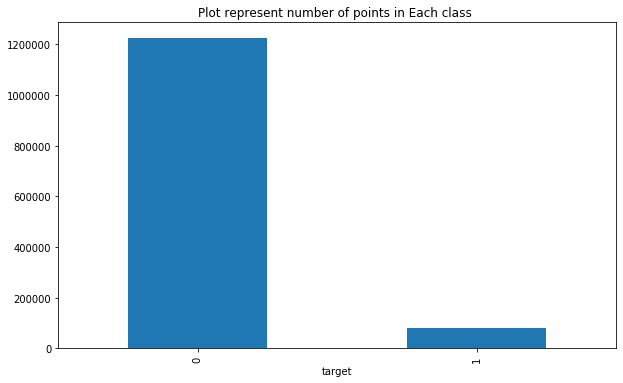

In [0]:
# Bar graph
plt.figure(figsize=(10, 6))
plt.title('Plot represent number of points in Each class ')
data.groupby("target")['qid'].count().plot.bar()


It shows that data is highly imbalanced

### Check for Duplicate

In [0]:
duplicate_question = data[['question_text', 'target']].groupby(['question_text']).count().reset_index()
print (duplicate_question.shape)
print ("Number of duplicate questions:",data.shape[0] - duplicate_question.shape[0])

(1306122, 2)
Number of duplicate questions: 0


### Check any Null Values

In [0]:
# Filling the null values with ' '
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [qid, question_text, target]
Index: []


In [0]:
# Data Visualization
def cloud(text, title, size = (10,7)):
    # Processing Text
    wordcloud = WordCloud(width=800, height=400,
                          collocations=False
                         ).generate(" ".join(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=25,color='w')
    plt.tight_layout(pad=0)
    plt.show()


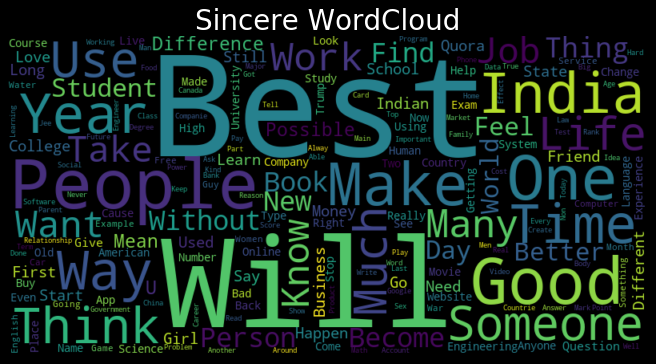

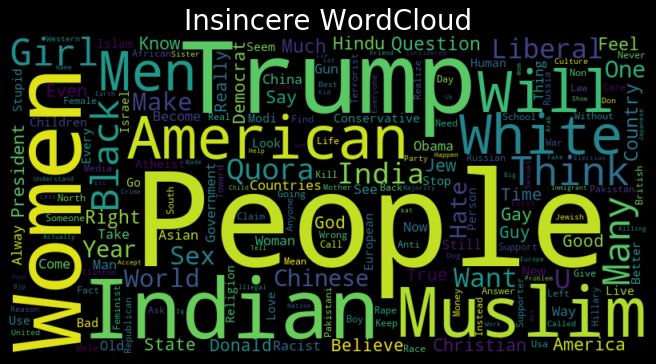

In [0]:
# https://www.kaggle.com/nicapotato/eli5-shap-lgbm-lr-interpretable-ml
for i,name in [(0,"Sincere"),(1,"Insincere")]:
     cloud(data.loc[data.target == i,"question_text"].str.title(), title="{} WordCloud".format(name), size=[8,5])

## 3.2 Basic Feature Extraction (before cleaning)

Let's now construct a few features like:
- ____Number of words in the question____= Length of Question q_len
- ___Number of Capital Words____= 
- ____Number of stop words in the question____=
- ___Number of different words in the question____=
- ___Number of user tags @ in the question____=
- ____Number of numerical values in the question____ = Numbers in the question
- ____Number of characters in the question____= Length of character in Question qchar_len
- ____Number of upper characters in the question____= Upper characters in the question
- ____Number of lower characters in the question____ = Lower characters in the question
- ___Average word length of word in the question___ -








In [0]:
# Text cleaning https://www.kaggle.com/sunnymarkliu/more-text-cleaning-to-increase-word-coverage
# https://www.kaggle.com/nicapotato/eli5-shap-lgbm-lr-interpretable-ml

In [4]:
nltk.download('stopwords')
stopword = stopwords.words('english')

#stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [0]:
data.shape

(1306122, 3)

In [ ]:
# ML Features https://www.kaggle.com/nicapotato/eli5-shap-lgbm-lr-interpretable-ml

if os.path.isfile('data_without_preprocessingwh.csv'):
    data = pd.read_csv('data_without_preprocessingwh.csv')
else:
    # Question Length
    data['q_len'] = data['question_text'].str.len()
    # Number of words in the question
    data['q_words'] = data['question_text'].apply(lambda row: len(row.split(" ")))
    # Number of Upper character in question
    data['u_chars'] = data['question_text'].apply(lambda row: sum(1 for c in row if c.isupper()))
    # Number of lower character in question
    data['l_chars'] = data['question_text'].apply(lambda row: sum(1 for c in row if c.islower()))
    # Number of stopwords in question
    data['n_stopwords'] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word in stopword))
    # Number of capital words in question
    data['n_cap_words'] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word.isupper()))
    # Number of different words in question
    data['n_diff_words'] = data['question_text'].apply(lambda row: len(set(row.split(" "))))
    # Averge Word length
    data['avg_word_len'] = data['question_text'].apply(lambda row: sum(len(i) for i in row.split(" "))/len(row.split(" ")))
    # Number of numerical Values in the text
    data['n_numerical_words'] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if word.isnumeric()))
    # Number of * in the question 
    data['n_user_tags'] = data['question_text'].apply(lambda row: sum(1 for c in row if c=='@'))
    # Number of * in the question 
    data['n_star'] = data['question_text'].apply(lambda row: sum(1 for c in row if c=='*'))
    
    # Number of F words - f**k contains folk, fork,
    data['nb_fk'] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r'[Ff]\S{2}[Kk]', word)))
    
    # Number of S word
    data["nb_sk"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[Ss]\S{2}[Kk]", word)))
    # Number of D words
    data["nb_dk"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[dD]ick", word)))
    # Number of incest
    data["nb_inst"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[iI]cest", word)))
    # Number of bestiality
    data["nb_bstlty"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[bB]estiality", word)))
    # Number of pedophilia
    data["nb_pedophilia"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[pP]edophilia", word)))
    
    # Number of occurence of You, insulting someone usually needs someone called : you
    data["nb_you"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Yy]ou\W", word)))
    # Just to check you really refered to my mother or mom ;-)
    data["nb_mother"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\Wmother\W", word)or re.findall(r"\Wmom\W", word)))
    # Just checking for toxic 19th century vocabulary
    data["nb_ng"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\Wnigger\W", word)))
    # Just checking for rape vocabulary
    data["nb_rp"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[Rr]ape\W", word)))
    
    data.to_csv("/content/gdrive/My Drive/CaseStudy/data_without_preprocessingwh.csv", index=False)

print (data.shape)
data.head()
    

In [ ]:
if os.path.isfile('/content/gdrive/My Drive/CaseStudy/test_data_without_preprocessing7l.csv'):
    test_data = pd.read_csv('/content/gdrive/My Drive/CaseStudy/test_data_without_preprocessing7l.csv')
else:
    # Question Length
    test_data['q_len'] = test_data['question_text'].str.len()
    # Number of words in the question
    test_data['q_words'] = test_data['question_text'].apply(lambda row: len(row.split(" ")))
    # Number of Upper character in question
    test_data['u_chars'] = test_data['question_text'].apply(lambda row: sum(1 for c in row if c.isupper()))
    # Number of lower character in question
    test_data['l_chars'] = test_data['question_text'].apply(lambda row: sum(1 for c in row if c.islower()))
    # Number of stopwords in question
    test_data['n_stopwords'] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word in stopword))
    # Number of capital words in question
    test_data['n_cap_words'] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word.isupper()))
    # Number of different words in question
    test_data['n_diff_words'] = test_data['question_text'].apply(lambda row: len(set(row.split(" "))))
    # Averge Word length
    test_data['avg_word_len'] = test_data['question_text'].apply(lambda row: sum(len(i) for i in row.split(" "))/len(row.split(" ")))
    # Number of numerical Values in the text
    test_data['n_numerical_words'] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if word.isnumeric()))
    # Number of * in the question 
    test_data['n_user_tags'] = test_data['question_text'].apply(lambda row: sum(1 for c in row if c=='@'))
    # Number of * in the question 
    test_data['n_star'] = test_data['question_text'].apply(lambda row: sum(1 for c in row if c=='*'))
    
    # Number of F words - f**k contains folk, fork,
    test_data['nb_fk'] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r'[Ff]\S{2}[Kk]', word)))
    
    # Number of S word
    test_data["nb_sk"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[Ss]\S{2}[Kk]", word)))
    # Number of D words
    test_data["nb_dk"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[dD]ick", word)))
    # Number of incest
    test_data["nb_inst"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[iI]cest", word)))
    # Number of bestiality
    test_data["nb_bstlty"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[bB]estiality", word)))
    # Number of pedophilia
    test_data["nb_pedophilia"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[pP]edophilia", word)))
    
    # Number of occurence of You, insulting someone usually needs someone called : you
    test_data["nb_you"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Yy]ou\W", word)))
    # Just to check you really refered to my mother or mom ;-)
    test_data["nb_mother"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\Wmother\W", word)or re.findall(r"\Wmom\W", word)))
    # Just checking for toxic 19th century vocabulary
    test_data["nb_ng"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\Wnigger\W", word)))
    # Just checking for rape vocabulary
    test_data["nb_rp"] = test_data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[Rr]ape\W", word)))
    
    test_data.to_csv("/content/gdrive/My Drive/CaseStudy/test_data_without_preprocessing7l.csv", index=False)

print (test_data.shape)
test_data.head()

In [0]:
data.columns

Index(['qid', 'question_text', 'target', 'q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

### 3.1.1. Analysis of some the text features 


In [0]:
temp_data = data.drop(['qid', 'question_text'],axis = 1)
temp_data.head()

,target,q_len,q_words,u_chars,l_chars,n_stopwords,n_cap_words,n_diff_words,avg_word_len,n_numerical_words,n_user_tags,n_star,nb_fk,nb_sk,nb_dk,nb_inst,nb_bstlty,nb_pedophilia,nb_you,nb_mother,nb_ng,nb_rp
0,0,72,13,2,53,6,0,13,4.615385,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,81,16,1,63,8,0,15,4.125000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,67,10,2,54,1,0,8,5.800000,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,57,9,4,44,2,0,9,5.444444,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,77,15,3,59,5,2,15,4.200000,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Number of columns in the data
len(data.columns)

24

In [0]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages:
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D.
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(temp_data, hue="target", size=3);
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [0]:
n = data.shape[0]
sns.pairplot(data[['q_len', 'q_words', 'u_chars','l_chars', 'n_stopwords', 'n_cap_words', 'target']][0:n], hue='target', vars=['q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words'])
plt.show()

- Preprocessing:
    Data points are not well sepated on the qiven points. It may be because of highly imbalance of data.

#### Question number of words Analysis

In [0]:
data['q_words'].describe()

count    1.306122e+06
mean     1.280350e+01
std      7.052138e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.220000e+02
Name: q_words, dtype: float64

In [0]:
# Maximum word in the question 
print ("Maximum words in the question:",data['q_words'].max())
print ("Minimum words in the question:",data['q_words'].min())

Maximum words in the question: 122
Minimum words in the question: 1


In [0]:
data['q_words'].value_counts()

9      124196
8      122459
10     116193
7      104838
11     100558
        ...  
60          1
62          1
64          1
65          1
122         1
Name: q_words, Length: 65, dtype: int64

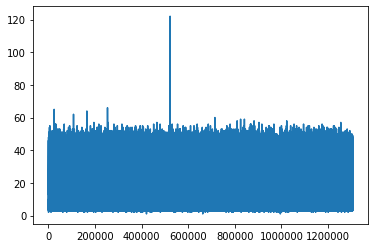

In [0]:
plt.plot(data['q_words']) 
plt.show()

Only One sentence length is More

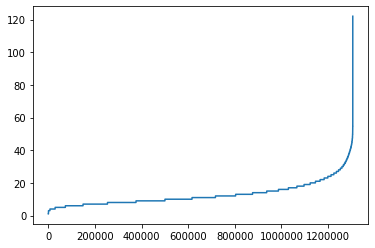

In [0]:
mx = np.sort(data['q_words']) 

plt.plot(mx) 
plt.show()

In [0]:
print (np.percentile(mx, 95))
print (np.percentile(mx, 99))
print (np.percentile(mx, 99.9))

print (np.percentile(mx, 99.99))
print (np.percentile(mx, 99.9999))
mx[-2:]

27.0
39.0
48.0
53.0
65.69387899991125


array([ 66, 122])

In [0]:
a = data['question_text'][data['q_words'] == 122]
a

522266    In "Star Trek 2013" why did they :\n\n*Spoiler...
Name: question_text, dtype: object

Text(0, 0.5, 'Number of times legnth')

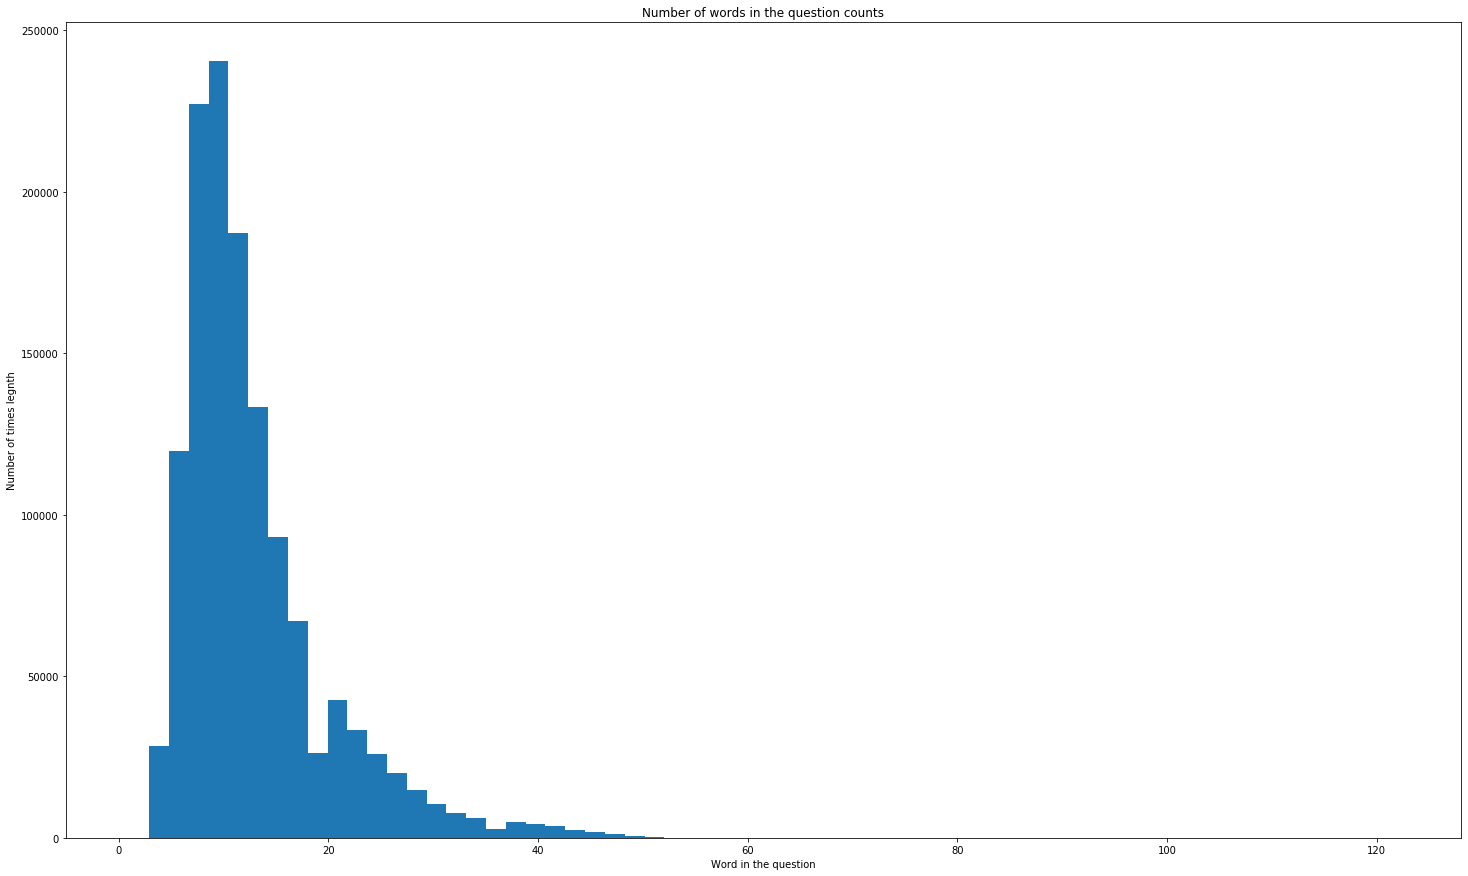

In [0]:
plt.figure(figsize=(25, 15))

plt.hist(data['q_words'], bins=64)

plt.title('Number of words in the question counts')
plt.xlabel('Word in the question')
plt.ylabel('Number of times legnth')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


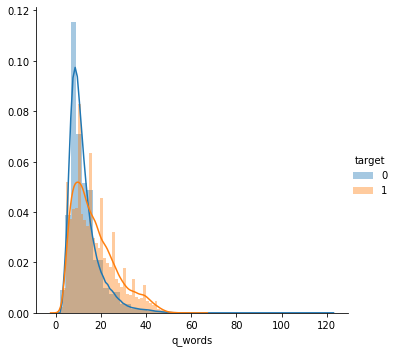

In [0]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'q_words')\
   .add_legend()
plt.show()

#### Question Length Analysis

In [0]:
data['q_len'].describe()

count    1.306122e+06
mean     7.067884e+01
std      3.878428e+01
min      1.000000e+00
25%      4.500000e+01
50%      6.000000e+01
75%      8.500000e+01
max      1.017000e+03
Name: q_len, dtype: float64

In [0]:
# Maximum word in the question 
print ("Maximum words in the question:",data['q_len'].max())
print ("Minimum words in the question:",data['q_len'].min())

Maximum words in the question: 1017
Minimum words in the question: 1


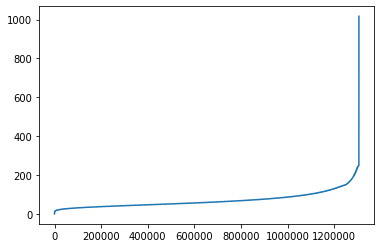

In [0]:
mx = np.sort(data['q_len']) 

plt.plot(mx) 
plt.show()

In [0]:
print (data['question_text'][data['q_len'] == 1017])
mx[-5:]

443216    What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan...
Name: question_text, dtype: object


array([ 332,  509,  752,  878, 1017])

Text(0, 0.5, 'Number of times legnth')

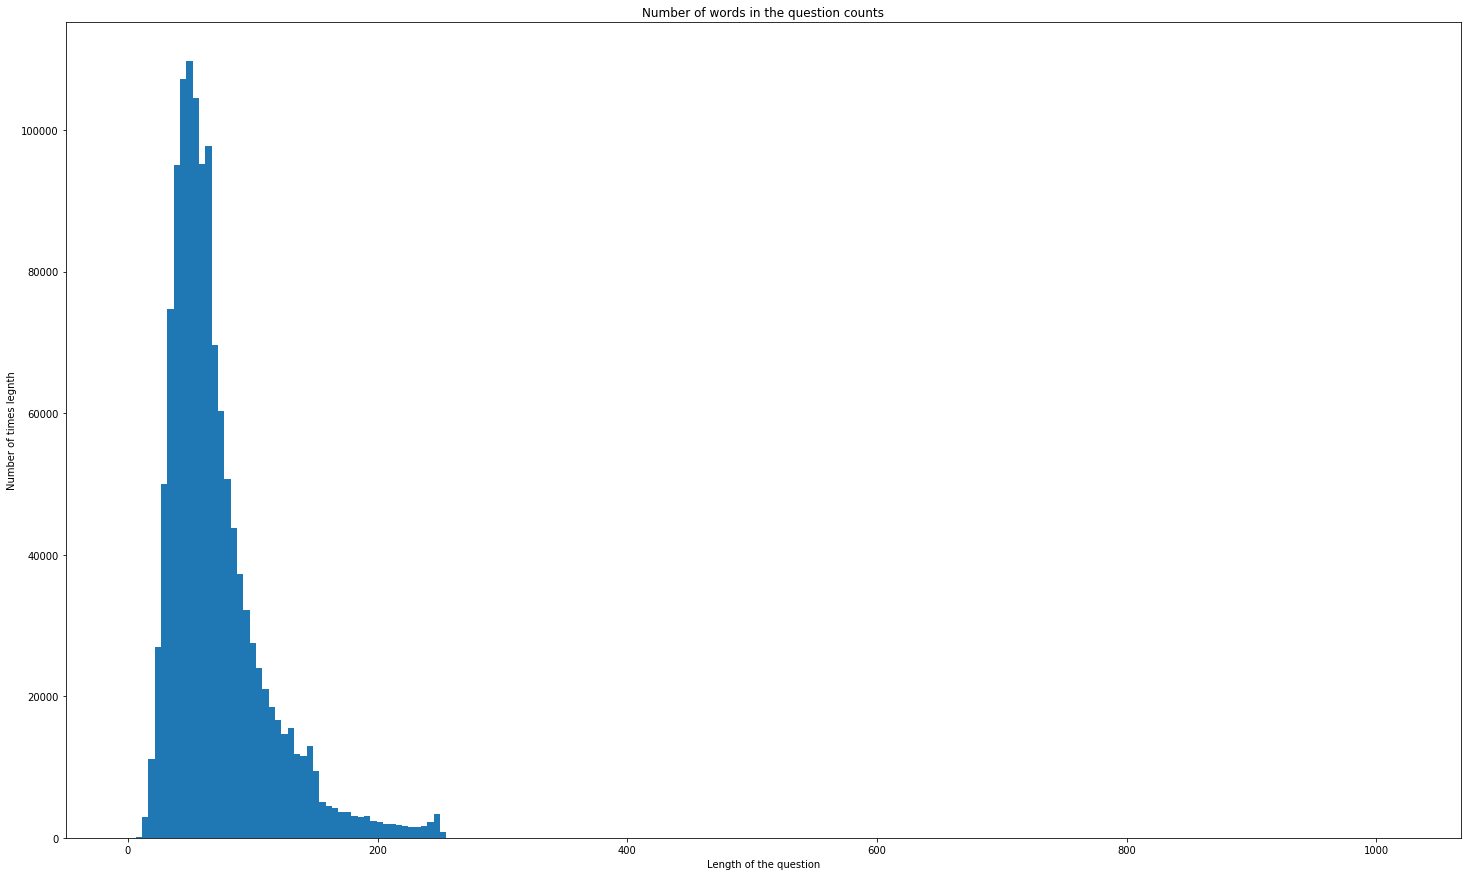

In [0]:
plt.figure(figsize=(25, 15))

plt.hist(data['q_len'], bins=200)

#plt.yscale('log', nonposy='clip')

plt.title('Number of words in the question counts')

plt.xlabel('Length of the question')

plt.ylabel('Number of times legnth')

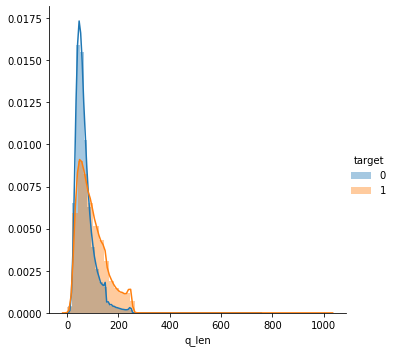

In [0]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'q_len')\
   .add_legend()
plt.show()


#### Univariate Analysis

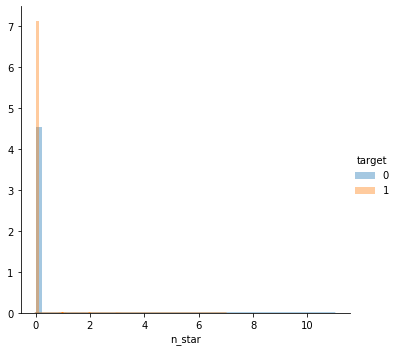

In [0]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_star')\
   .add_legend()
plt.show()

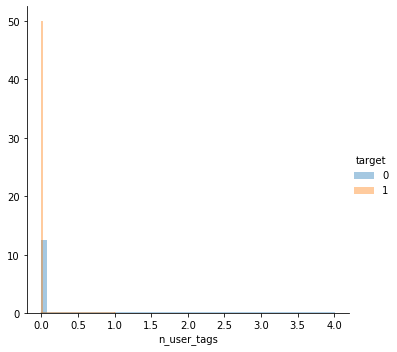

In [0]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_user_tags')\
   .add_legend()
plt.show()

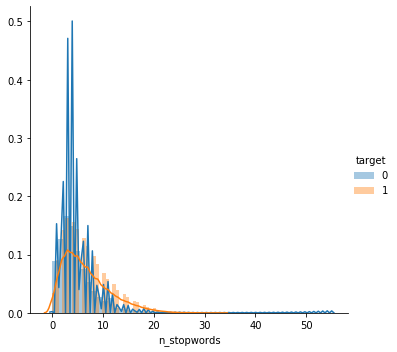

In [0]:
#n_stopwords
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_stopwords')\
   .add_legend()
plt.show()

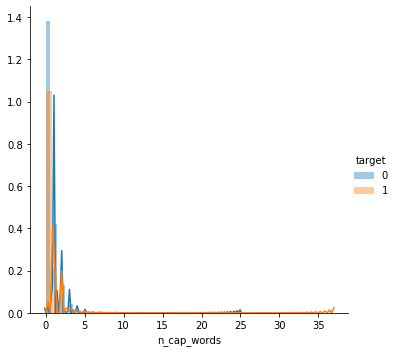

In [0]:
# n_cap_words
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_cap_words')\
   .add_legend()
plt.show()


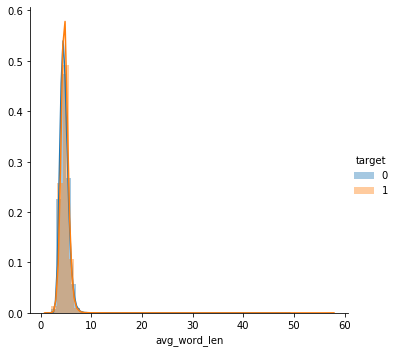

In [0]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'avg_word_len')\
   .add_legend()
plt.show()


In [0]:
data.columns

Index(['qid', 'question_text', 'target', 'q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_star', 'n_user_tags', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

In [0]:
print (max(data['nb_rp']))

2


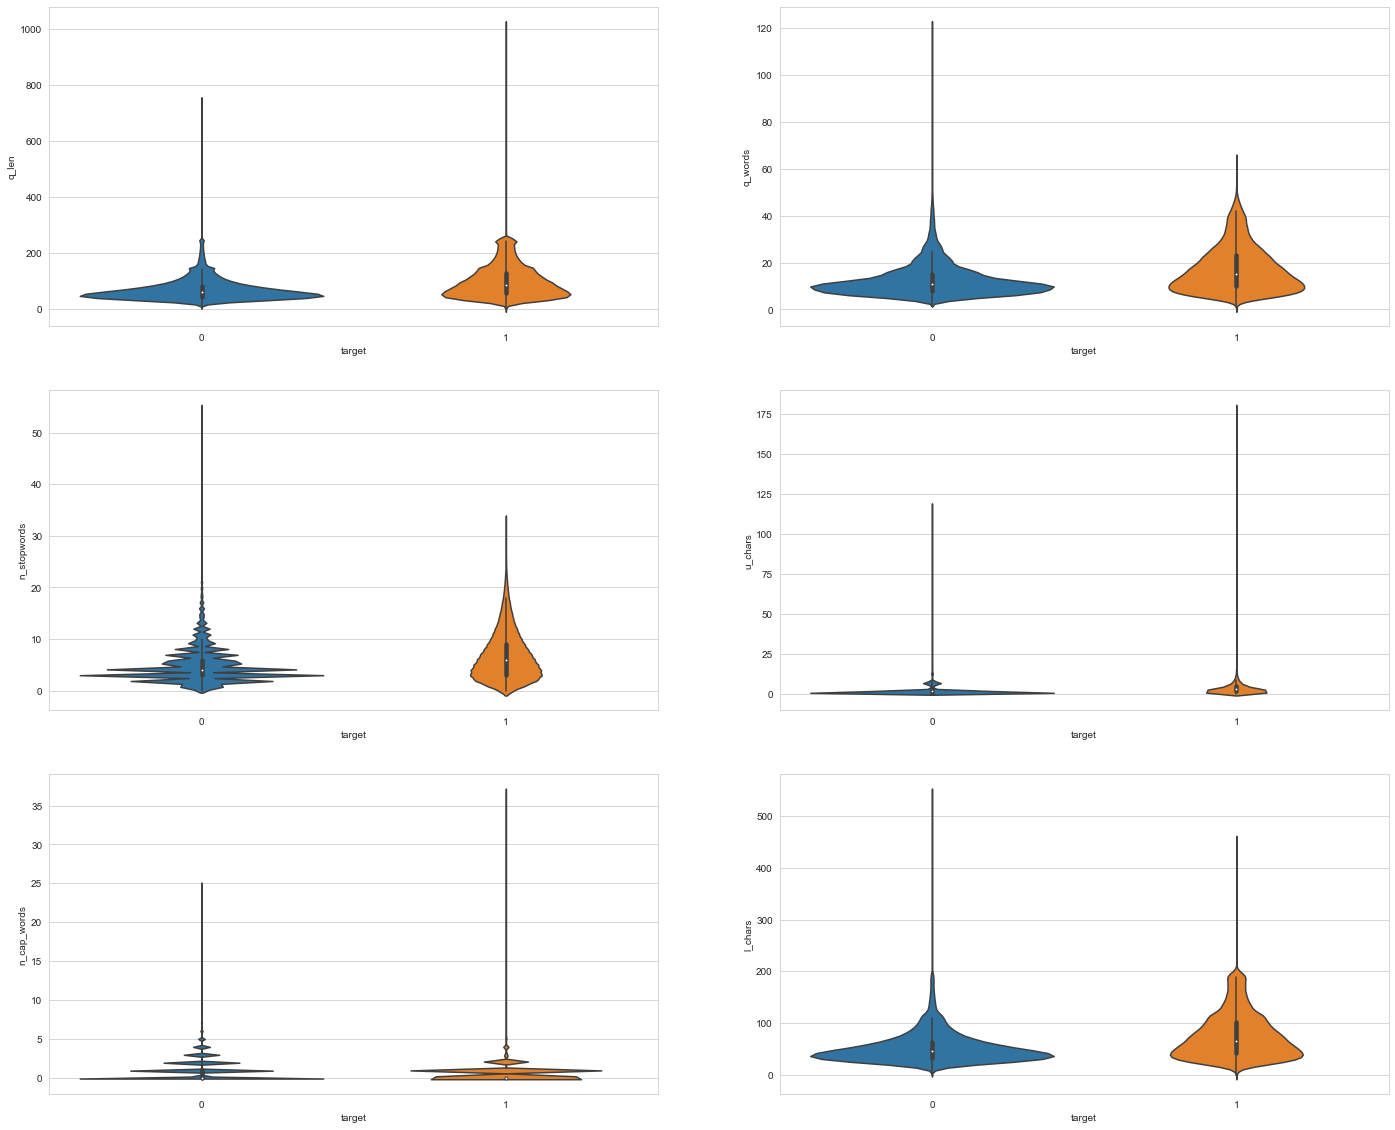

In [0]:
plt.figure(figsize=(24, 20))
plt.subplot(3,2,1)
sns.violinplot(x='target', y='q_len', data= data)
plt.subplot(3,2,2)
sns.violinplot(x='target', y='q_words', data= data)
plt.subplot(3,2,3)
sns.violinplot(x='target', y='n_stopwords', data= data)
plt.subplot(3,2,4)
sns.violinplot(x='target', y='u_chars', data= data)

plt.subplot(3,2,5)
sns.violinplot(x='target', y='n_cap_words', data= data)
plt.subplot(3,2,6)
sns.violinplot(x='target', y='l_chars', data= data)

plt.show()

### Visualization

In [0]:
temp_data.head()

,target,q_len,q_words,u_chars,l_chars,n_stopwords,n_cap_words,n_diff_words,avg_word_len,n_numerical_words,n_user_tags,n_star,nb_fk,nb_sk,nb_dk,nb_inst,nb_bstlty,nb_pedophilia,nb_you,nb_mother,nb_ng,nb_rp
0,0,72,13,2,53,6,0,13,4.615385,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,81,16,1,63,8,0,15,4.125000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,67,10,2,54,1,0,8,5.800000,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,57,9,4,44,2,0,9,5.444444,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,77,15,3,59,5,2,15,4.200000,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
temp_data[1:]

,target,q_len,q_words,u_chars,l_chars,n_stopwords,n_cap_words,n_diff_words,avg_word_len,n_numerical_words,n_user_tags,n_star,nb_fk,nb_sk,nb_dk,nb_inst,nb_bstlty,nb_pedophilia,nb_you,nb_mother,nb_ng,nb_rp
1,0,81,16,1,63,8,0,15,4.125000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,67,10,2,54,1,0,8,5.800000,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,57,9,4,44,2,0,9,5.444444,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,77,15,3,59,5,2,15,4.200000,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,72,10,6,55,2,0,10,6.300000,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306117,0,93,17,1,73,8,0,16,4.529412,0,0,0,0,0,0,0,0,0,0,0,0,0
1306118,0,91,19,12,60,7,4,18,3.842105,0,0,0,0,0,0,0,0,0,0,0,0,0
1306119,0,25,4,1,20,0,0,4,5.500000,0,0,0,0,0,0,0,0,0,0,0,0,0
1306120,0,71,13,3,55,4,1,13,4.538462,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
temp_data.columns

Index(['target', 'q_len', 'q_words', 'u_chars', 'l_chars', 'n_stopwords',
       'n_cap_words', 'n_diff_words', 'avg_word_len', 'n_numerical_words',
       'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk', 'nb_inst',
       'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng', 'nb_rp'],
      dtype='object')

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler


X = MinMaxScaler().fit_transform(temp_data[['q_len', 'q_words', 'u_chars', 'l_chars', 'n_stopwords',
       'n_cap_words', 'n_diff_words', 'avg_word_len', 'n_numerical_words',
       'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk', 'nb_inst',
       'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng', 'nb_rp']])
y = temp_data['target'].values

In [0]:

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1306122 samples in 4186.439s...
[t-SNE] Computed neighbors for 1306122 samples in 18224.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1306122
[t-SNE] Computed conditional probabilities for sample 2000 / 1306122
[t-SNE] Computed conditional probabilities for sample 3000 / 1306122
[t-SNE] Computed conditional probabilities for sample 4000 / 1306122
[t-SNE] Computed conditional probabilities for sample 5000 / 1306122
[t-SNE] Computed conditional probabilities for sample 6000 / 1306122
[t-SNE] Computed conditional probabilities for sample 7000 / 1306122
[t-SNE] Computed conditional probabilities for sample 8000 / 1306122
[t-SNE] Computed conditional probabilities for sample 9000 / 1306122
[t-SNE] Computed conditional probabilities for sample 10000 / 1306122
[t-SNE] Computed conditional probabilities for sample 11000 / 1306122
[t-SNE] Computed conditional probabilities for sample 12000 / 1306122
[t-SNE] Compute

[t-SNE] Computed conditional probabilities for sample 230000 / 1306122
[t-SNE] Computed conditional probabilities for sample 231000 / 1306122
[t-SNE] Computed conditional probabilities for sample 232000 / 1306122
[t-SNE] Computed conditional probabilities for sample 233000 / 1306122
[t-SNE] Computed conditional probabilities for sample 234000 / 1306122
[t-SNE] Computed conditional probabilities for sample 235000 / 1306122
[t-SNE] Computed conditional probabilities for sample 236000 / 1306122
[t-SNE] Computed conditional probabilities for sample 237000 / 1306122
[t-SNE] Computed conditional probabilities for sample 238000 / 1306122
[t-SNE] Computed conditional probabilities for sample 239000 / 1306122
[t-SNE] Computed conditional probabilities for sample 240000 / 1306122
[t-SNE] Computed conditional probabilities for sample 241000 / 1306122
[t-SNE] Computed conditional probabilities for sample 242000 / 1306122
[t-SNE] Computed conditional probabilities for sample 243000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 460000 / 1306122
[t-SNE] Computed conditional probabilities for sample 461000 / 1306122
[t-SNE] Computed conditional probabilities for sample 462000 / 1306122
[t-SNE] Computed conditional probabilities for sample 463000 / 1306122
[t-SNE] Computed conditional probabilities for sample 464000 / 1306122
[t-SNE] Computed conditional probabilities for sample 465000 / 1306122
[t-SNE] Computed conditional probabilities for sample 466000 / 1306122
[t-SNE] Computed conditional probabilities for sample 467000 / 1306122
[t-SNE] Computed conditional probabilities for sample 468000 / 1306122
[t-SNE] Computed conditional probabilities for sample 469000 / 1306122
[t-SNE] Computed conditional probabilities for sample 470000 / 1306122
[t-SNE] Computed conditional probabilities for sample 471000 / 1306122
[t-SNE] Computed conditional probabilities for sample 472000 / 1306122
[t-SNE] Computed conditional probabilities for sample 473000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 690000 / 1306122
[t-SNE] Computed conditional probabilities for sample 691000 / 1306122
[t-SNE] Computed conditional probabilities for sample 692000 / 1306122
[t-SNE] Computed conditional probabilities for sample 693000 / 1306122
[t-SNE] Computed conditional probabilities for sample 694000 / 1306122
[t-SNE] Computed conditional probabilities for sample 695000 / 1306122
[t-SNE] Computed conditional probabilities for sample 696000 / 1306122
[t-SNE] Computed conditional probabilities for sample 697000 / 1306122
[t-SNE] Computed conditional probabilities for sample 698000 / 1306122
[t-SNE] Computed conditional probabilities for sample 699000 / 1306122
[t-SNE] Computed conditional probabilities for sample 700000 / 1306122
[t-SNE] Computed conditional probabilities for sample 701000 / 1306122
[t-SNE] Computed conditional probabilities for sample 702000 / 1306122
[t-SNE] Computed conditional probabilities for sample 703000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 920000 / 1306122
[t-SNE] Computed conditional probabilities for sample 921000 / 1306122
[t-SNE] Computed conditional probabilities for sample 922000 / 1306122
[t-SNE] Computed conditional probabilities for sample 923000 / 1306122
[t-SNE] Computed conditional probabilities for sample 924000 / 1306122
[t-SNE] Computed conditional probabilities for sample 925000 / 1306122
[t-SNE] Computed conditional probabilities for sample 926000 / 1306122
[t-SNE] Computed conditional probabilities for sample 927000 / 1306122
[t-SNE] Computed conditional probabilities for sample 928000 / 1306122
[t-SNE] Computed conditional probabilities for sample 929000 / 1306122
[t-SNE] Computed conditional probabilities for sample 930000 / 1306122
[t-SNE] Computed conditional probabilities for sample 931000 / 1306122
[t-SNE] Computed conditional probabilities for sample 932000 / 1306122
[t-SNE] Computed conditional probabilities for sample 933000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 1147000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1148000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1149000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1150000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1151000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1152000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1153000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1154000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1155000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1156000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1157000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1158000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1159000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1160000 / 

<Figure size 2520x1800 with 0 Axes>

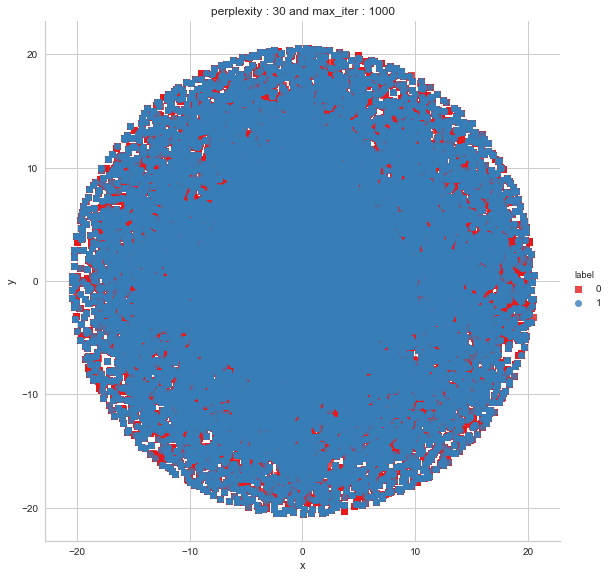

In [0]:
plt.figure(figsize=(35, 25))
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

### Preprocessing of text:
- Preprocessing:
    - Removing html tags 
    - Removing Punctutions
    - Cleanig Abbrevations
    - Correcting Spellings
    - Clean Lowercase
    - Clean Unicode
    - Clean math
    - Clean Language
    - Clean space
    - Clean bad-case words
    - Clean spaces
    - Expanding Contraction
    - Clean repeated word
    - Check oov[out of Vocabulary] words
    - Remove STOP-WORDS
    

In [ ]:
# https://www.kaggle.com/kentaronakanishi/18th-place-solution
puncts = [
    ',', '.', '"', ':', ')', '(', '-', '!', '?','|', ';', "'", '$', '&',
    '/', '[', ']', '%', '=', '#', '*', '+', '\\', '•', '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '¬', '░', '¶', '↑', '±',  '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '₹', '´'
]

In [ ]:
abbreviations = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "here's": "here is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "who'd": "who would",
    "who're": "who are",
    "'re": " are",
    "tryin'": "trying",
    "doesn'": "does not",
    'howdo': 'how do',
    'whatare': 'what are',
    'howcan': 'how can',
    'howmuch': 'how much',
    'howmany': 'how many',
    'whydo': 'why do',
    'doI': 'do I',
    'theBest': 'the best',
    'howdoes': 'how does',
}


In [0]:
! pip install regex

In [ ]:
import regex
spells = {
    'colour': 'color',
    'centre': 'center',
    'favourite': 'favorite',
    'travelling': 'traveling',
    'counselling': 'counseling',
    'theatre': 'theater',
    'cancelled': 'canceled',
    'labour': 'labor',
    'organisation': 'organization',
    'wwii': 'world war 2',
    'citicise': 'criticize',
    'youtu.be': 'youtube',
    'youtu ': 'youtube ',
    'qoura': 'quora',
    'sallary': 'salary',
    'Whta': 'what',
    'whta': 'what',
    'narcisist': 'narcissist',
    'mastrubation': 'masturbation',
    'mastrubate': 'masturbate',
    "mastrubating": 'masturbating',
    'pennis': 'penis',
    'Etherium': 'ethereum',
    'etherium': 'ethereum',
    'narcissit': 'narcissist',
    'bigdata': 'big data',
    '2k17': '2017',
    '2k18': '2018',
    '2k19': '2020',
    'qouta': 'quota',
    'exboyfriend': 'ex boyfriend',
    'exgirlfriend': 'ex girlfriend',
    'airhostess': 'air hostess',
    'whst': 'what',
    'watsapp': 'whatsapp',
    'demonitisation': 'demonetization',
    'demonitization': 'demonetization',
    'demonetisation': 'demonetization',
    'quorans': 'quora user',
    'quoran': 'quora user',
    'pokémon': 'pokemon',
    'bacteries': 'batteries', 
    'yr old': 'years old',
}

codes = ['\x7f', '\u200b', '\xa0', '\ufeff', '\u200e', '\u202a', '\u202c', '\u2060', '\uf0d8', '\ue019', '\uf02d', '\u200f', '\u2061', '\ue01b']


langs1 = r'[\p{Katakana}\p{Hiragana}\p{Han}]' # regex
langs2 = r'[ஆய்தஎழுத்துஆயுதஎழுத்துशुषछछशुषدوउसशुष북한내제តើបងប្អូនមានមធ្យបាយអ្វីខ្លះដើម្បីរកឃើញឯកសារអំពីប្រវត្តិស្ត្រនៃប្រាសាទអង្គរវट्टरौरआदસંઘરાજ્યपीतऊनअहএকটিবাড়িএকটিখামারএরঅধীনেপদেরবাছাইপরীক্ষাএরপ্রশ্নওউত্তরসহকোথায়পেতেপারিص、。Емелядуракلكلمقاممقال수능ί서로가를행복하게기乡국고등학교는몇시간업니《》싱관없어나이रचा키کپڤ」मिलगईकलेजेकोठंडकऋॠऌॡर]'
compiled_langs1 = regex.compile(langs1)
compiled_langs2 = re.compile(langs2)


In [ ]:
def _clean_math(x, compiled_re):
    return compiled_re.sub(' <math> ', x)

In [ ]:
def preprocess(x):
    
    x = str(x).lower()
    return x
    
def _clean_unicode(x):
    for u in codes:
        if u in x:
            x = x.replace(u, '')
    return x

def clean_math(df):
    math_puncts = 'θπα÷⁴≠β²¾∫≥⇒¬∠＝∑Φ√½¼'
    math_puncts_long = [r'\\frac', r'\[math\]', r'\[/math\]', r'\\lim']
    compiled_math = re.compile('(%s)' % '|'.join(math_puncts))
    compiled_math_long = re.compile('(%s)' % '|'.join(math_puncts_long))
    df['question_text'] = df['question_text'].apply(lambda x: _clean_math(x, compiled_math_long))
    df['question_text'] = df['question_text'].apply(lambda x: _clean_math(x, compiled_math))
    return df

def clean_abbreviation(df, abbreviations):
    compiled_abbreviation = re.compile('(%s)' % '|'.join(abbreviations.keys()))
    #print (compiled_abbreviation)
    def replace(match):
        return abbreviations[match.group(0)]
    df['question_text'] = df["question_text"].apply(
        lambda x: _clean_abreviation(x, compiled_abbreviation, replace)
    )
    return df

def _clean_abreviation(x, compiled_re, replace):
    return compiled_re.sub(replace, x)


def clean_spells(df, spells):
    compiled_spells = re.compile('(%s)' % '|'.join(spells.keys()))
    def replace(match):
        return spells[match.group(0)]
    df['question_text'] = df["question_text"].apply(
        lambda x: _clean_spells(x, compiled_spells, replace)
    )
    return df
    
def _clean_spells(x, compiled_re, replace):
    return compiled_re.sub(replace, x)

def _clean_language(x, compiled_re):
    return compiled_re.sub(' <lang> ', x)


def _clean_puncts(x, puncts):
    x = str(x)
    # added space around puncts after replace
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x


def _clean_space(x, compiled_re):
    return compiled_re.sub(" ", x)
    

In [ ]:
data.shape

In [0]:
if os.path.isfile('/content/gdrive/My Drive/CaseStudy/data_after_preprocessingwh.csv'):
    data = pd.read_csv('/content/gdrive/My Drive/CaseStudy/data_after_preprocessingwh.csv')
else:
    data["question_text"] = data["question_text"].fillna("").apply(preprocess)
    data["question_text"] = data["question_text"].fillna("").apply(_clean_unicode)
    data = clean_math(data)
    data = clean_abbreviation(data, abbreviations)
    data = clean_spells(data, spells)
    data['question_text'] = data['question_text'].apply(lambda x: _clean_language(x, compiled_langs1))
    data['question_text'] = data['question_text'].apply(lambda x: _clean_language(x, compiled_langs2))
    data['question_text'] = data['question_text'].apply(lambda x: _clean_puncts(x, puncts))
    compiled_re = re.compile(r"\s+")
    data['question_text'] = data["question_text"].apply(lambda x: _clean_space(x, compiled_re))
    data.to_csv('/content/gdrive/My Drive/CaseStudy/data_after_preprocessingwh.csv', index=False)
    
#data.head()

In [0]:
if os.path.isfile('/content/gdrive/My Drive/CaseStudy/test_data_after_preprocessing7l.csv'):
    test_data = pd.read_csv('/content/gdrive/My Drive/CaseStudy/test_data_after_preprocessing7l.csv')
else:
    test_data["question_text"] = test_data["question_text"].fillna("").apply(preprocess)
    test_data["question_text"] = test_data["question_text"].fillna("").apply(_clean_unicode)
    test_data = clean_math(test_data)
    test_data = clean_abbreviation(test_data, abbreviations)
    test_data = clean_spells(test_data, spells)
    test_data['question_text'] = test_data['question_text'].apply(lambda x: _clean_language(x, compiled_langs1))
    test_data['question_text'] = test_data['question_text'].apply(lambda x: _clean_language(x, compiled_langs2))
    test_data['question_text'] = test_data['question_text'].apply(lambda x: _clean_puncts(x, puncts))
    compiled_re = re.compile(r"\s+")
    test_data['question_text'] = test_data["question_text"].apply(lambda x: _clean_space(x, compiled_re))
    test_data.to_csv('/content/gdrive/My Drive/CaseStudy/test_data_after_preprocessing7l.csv', index=False)
    
#test_data.head()

### Text Vectorization 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 2),
        max_features=20000)
vectorizer.fit(data['question_text'])
tfidf_question_text = vectorizer.transform(data['question_text'])

print("Shape of matrix after Tfidf encodig ",tfidf_question_text.shape)


Shape of matrix after Tfidf encodig  (1306122, 20000)


TFIDF vector TSNE Visualization only text data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


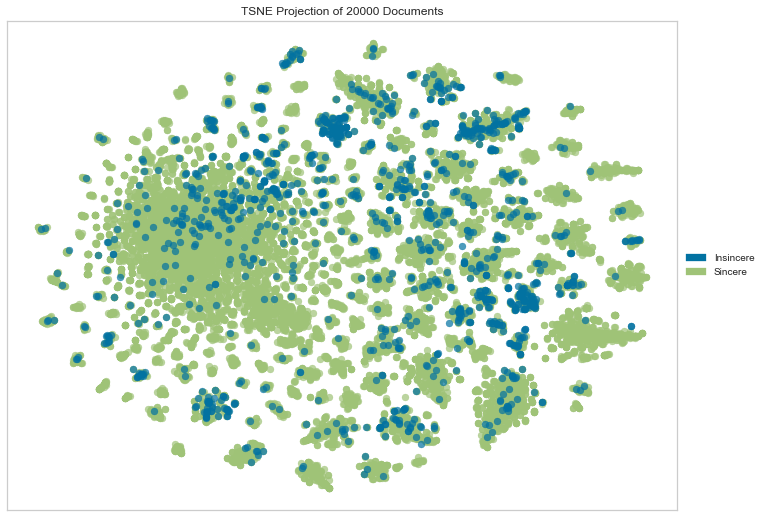

In [0]:
# 
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
n = 20000
target_names = ["Sincere","Insincere"]
tsne.fit(tfidf_question_text[:n], data.target[:n].map({1: target_names[1],0:target_names[0]}))
tsne.show()


In [0]:
# Some clusters form but data is well seperated

In [0]:
from scipy.sparse import hstack
temp2 = hstack((temp_data, tfidf_question_text)).tocsr()

print (temp2.shape)
print (tfidf_question_text.shape)

(1306122, 20022)
(1306122, 20000)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


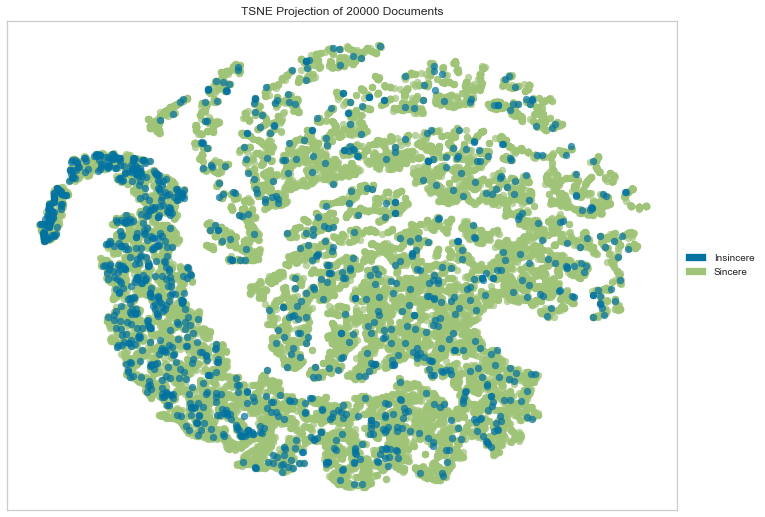

In [0]:
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
n = 20000

tsne.fit(temp2[:n], data.target[:n].map({1: target_names[1],0:target_names[0]}))
tsne.show()

In [0]:
# Some clusers asr form but not well seperated

### Train Test split 70:20

In [0]:
data.columns

Index(['qid', 'question_text', 'target', 'q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

In [0]:
test_data.columns

Index(['qid', 'question_text', 'q_len', 'q_words', 'u_chars', 'l_chars',
       'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

In [0]:
# https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

col_names = ['q_len', 'q_words', 'u_chars', 'l_chars',
       'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp']

data_features = data[col_names]
test_data_features = test_data[col_names]
scaler = StandardScaler().fit(data_features.values)
train_features = scaler.transform(data_features.values)
test_features = scaler.transform(test_data_features.values)

data[col_names] = train_features
test_data[col_names] = test_features

In [6]:
del data_features, test_data_features, train_features, test_features, scaler; gc.collect()

0

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    sns.set(font_scale=1.8)
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    print ("**** Confusion Matrix ******")
    print (C)
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    print ("**** Precision Matrix ******")
    print (B)
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    print ("**** Recall Matrix ******")
    print (A)
    
    plt.show()

Embedding using glove and wiki

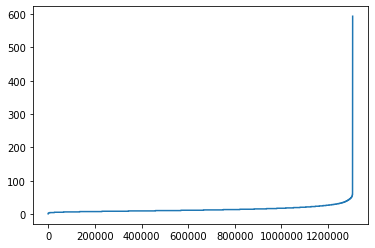

593
31.0
46.0
70.0


In [0]:
from matplotlib import pyplot as plt 
qs_len = [] 
for i in (data.question_text):  
  qs_len.append(len(i.split())) #print (max_len) 
mx = np.sort(qs_len) 

plt.plot(mx) 
plt.show() 
print (np.max(mx)) 
print (np.percentile(mx, 95))
print (np.percentile(mx, 99))
print (np.percentile(mx, 99.99))


In [0]:
print (mx[-400:])

[ 62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62
  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62  62
  62  62  62  62  62  62  62  62  62  63  63  63  63  63  63  63  63  63
  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63
  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63  63
  63  63  63  63  63  63  63  63  64  64  64  64  64  64  64  64  64  64
  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64  64
  64  64  64  64  64  64  64  64  64  64  65  65  65  65  65  65  65  65
  65  65  65  65  65  65  65  65  65  65  65  65  65  65  65  65  65  65
  65  65  65  65  65  65  65  65  66  66  66  66  66  66  66  66  66  66
  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66  66
  66  66  66  66  66  66  66  66  66  66  66  66  66  66  67  67  67  67
  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67  67
  67  67  67  68  68  68  68  68  68  68  68  68  6

In [8]:
# Tokenizing and give the number to the word # Embedding Text using gloove 
# word embedding https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/ 
max_features = 140000
X_train_question = data['question_text'] 
X_test_question = test_data['question_text']
tokenizer = Tokenizer(num_words=max_features) 
tokenizer.fit_on_texts(list(X_train_question)) 
vocab_size = len(tokenizer.word_index) + 1 
print (vocab_size) 
train_encoded_docs = tokenizer.texts_to_sequences(X_train_question) 
test_encoded_docs = tokenizer.texts_to_sequences(X_test_question) 
max_length = 70
train_padded_docs = pad_sequences(train_encoded_docs, maxlen=max_length, padding='post') 
test_padded_docs = pad_sequences(test_encoded_docs, maxlen = max_length, padding='post') 
print(train_padded_docs[0])


194281
[   9   48 6592 7075  159   57 6046   38    4 1144    6    1 8301    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [9]:
del X_train_question, X_test_question, train_encoded_docs, test_encoded_docs; gc.collect()

0

In [10]:
print (test_padded_docs.shape)
train_padded_docs.shape

(375806, 70)


(1306122, 70)

In [11]:
train_padded_docs = pd.DataFrame(train_padded_docs)
test_padded_docs = pd.DataFrame(test_padded_docs)
train_data = pd.concat([train_padded_docs, data], axis=1)
#test_data = pd.concat([test_padded_docs, data], axis=1)
print (train_data.shape)
print (test_data.head())

(1306122, 94)
                    qid  ...     nb_rp
0  0000163e3ea7c7a74cd7  ... -0.015419
1  00002bd4fb5d505b9161  ... -0.015419
2  00007756b4a147d2b0b3  ... -0.015419
3  000086e4b7e1c7146103  ... -0.015419
4  0000c4c3fbe8785a3090  ... -0.015419

[5 rows x 23 columns]


In [12]:
y = train_data.target
X = train_data.drop(['qid', 'target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 40, stratify= y)
test_data = test_data.drop(['qid'], axis= 1)
print (X_train.shape)
print (X_test.shape)
print (y.shape)
print (test_data.shape)
#X_train.head()

(1044897, 92)
(261225, 92)
(1306122,)
(375806, 22)


In [13]:
train_padded_docs = X_train.iloc[:,[i for i in range(0,70)]] #[np.arange(0,70)] ]
cv_padded_docs = X_test.iloc[:,[i for i in range(0,70)]] #[np.arange(0,70)] ]
print (train_padded_docs.shape)

print (cv_padded_docs.shape)

(1044897, 70)
(261225, 70)


In [14]:
del X; gc.collect()

0

In [15]:
print (len(X_train.columns))
X_train = X_train.iloc[:, [i for i in range(70, len(X_train.columns))]]
X_cv = X_test.iloc[:, [i for i in range(70, len(X_test.columns))]]


92


In [16]:
print (X_train.shape)
print (X_cv.shape)
#X_train.head()

(1044897, 22)
(261225, 22)


In [17]:
# https://www.kaggle.com/shujian/blend-of-lstm-and-cnn-with-4-embeddings-1200d

EMBEDDING_FILE = '/content/gdrive/My Drive/CaseStudy/glove.840B.300d.txt'
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_1 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_1[i] = embedding_vector

del embeddings_index; gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


41

In [18]:
EMBEDDING_FILE = '/content/gdrive/My Drive/CaseStudy/paragram_300_sl999.txt'
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE, encoding="utf8", errors='ignore') if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_2 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_2[i] = embedding_vector

del embeddings_index; gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


41

In [19]:
EMBEDDING_FILE = '/content/gdrive/My Drive/CaseStudy/wiki-news-300d-1M.vec'
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE, encoding="utf8", errors='ignore') if len(o)>100)


all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_3 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_3[i] = embedding_vector

del embeddings_index; gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


41

In [0]:
del data

In [0]:
embedding_matrix1 = np.concatenate(((np.array(embedding_matrix_1)*0.7) , (np.array(embedding_matrix_2)*0.3 )), axis=1)

In [0]:
embedding_matrix1 = np.concatenate((embedding_matrix_1 , embedding_matrix_2), axis=1)

In [0]:
embedding_matrix = np.concatenate((embedding_matrix_1 , embedding_matrix_2, embedding_matrix_3), axis=1)

In [0]:
#del data
#del param_embeddings_index
#del glove_embeddings_index

In [25]:
#print (test_data.columns)
test_data = test_data.drop(['question_text'], axis=1)
print (test_data.shape)
test_padded_docs.shape

(375806, 21)


(375806, 70)

In [26]:
X_train_stat = X_train.drop(['question_text'], axis = 1)
X_cv_stat = X_cv.drop(['question_text'], axis = 1)

print (X_train_stat.shape)
print (X_cv_stat.shape)

(1044897, 21)
(261225, 21)


In [0]:
aa = X_train_stat.to_numpy()
#print (aa.shape)
X_train_stat = aa.reshape( (X_train_stat.shape[0], 21, 1))

In [0]:
aa = X_test_stat.to_numpy()
#print (aa.shape)
X_test_stat = aa.reshape( (X_test_stat.shape[0], 21, 1))

In [0]:
# Function API in Keras https://machinelearningmastery.com/keras-functional-api-deep-learning/ 
from keras.layers.normalization import BatchNormalization 
from keras.initializers import RandomNormal 
from keras import regularizers 

In [28]:
embedding_matrix.shape

(140000, 900)

Define a Model

In [39]:
input1 = Input(shape=(70,)) 
#input1 = Input(shape=(100,), name = 'Input_sequence_Text')
embedding = Embedding(max_features, 300 * 3, weights=[embedding_matrix], input_length= 70,  trainable=False, name = 'Embedding_Text')(input1)
dropout = SpatialDropout1D(0.4, name='SpatialDropout')(embedding)
bidirectionLSTM = Bidirectional(CuDNNLSTM(256, return_sequences=True), name= 'BidirectionLSTM')(dropout)
#bidirectionLSTM2 = Bidirectional(CuDNNGRU(128, return_sequences=True), name= 'BidirectionLSTM2')(bidirectionLSTM)
conv11 = Conv1D(64, kernel_size= 3, name='1D_Convolution')(bidirectionLSTM)
flattan1 = Flatten(name= 'Flatten1')(conv11)

input2 = Input(shape=(21,), name = 'input_stat_featues') 
embed2 = Embedding(21, 50)(input2)
conv2 = Conv1D(64, kernel_size= 3, activation='relu', kernel_regularizer= regularizers.l2(0.002), name='Conv1d')(embed2) 
flatten2 = Flatten(name='Flatten2')(conv2)

merge = concatenate([flattan1, flatten2], name='concatenate')
dense64 = Dense(64, activation="relu", name='1Dense64')(merge)
batchnormal = BatchNormalization(name='BatchNormalization')(dense64)
dense3 = Dense(64, activation="relu", name='2Dense64')(batchnormal)
dropout2 = Dropout(0.1, name='Dropout2')(dense3)

final = Dense(1, activation="sigmoid")(dropout2)
model = Model(inputs=[input1, input2], outputs=final)
print (model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 70)           0                                            
__________________________________________________________________________________________________
Embedding_Text (Embedding)      (None, 70, 900)      126000000   input_3[0][0]                    
__________________________________________________________________________________________________
SpatialDropout (SpatialDropout1 (None, 70, 900)      0           Embedding_Text[0][0]             
__________________________________________________________________________________________________
input_stat_featues (InputLayer) (None, 21)           0                                            
____________________________________________________________________________________________

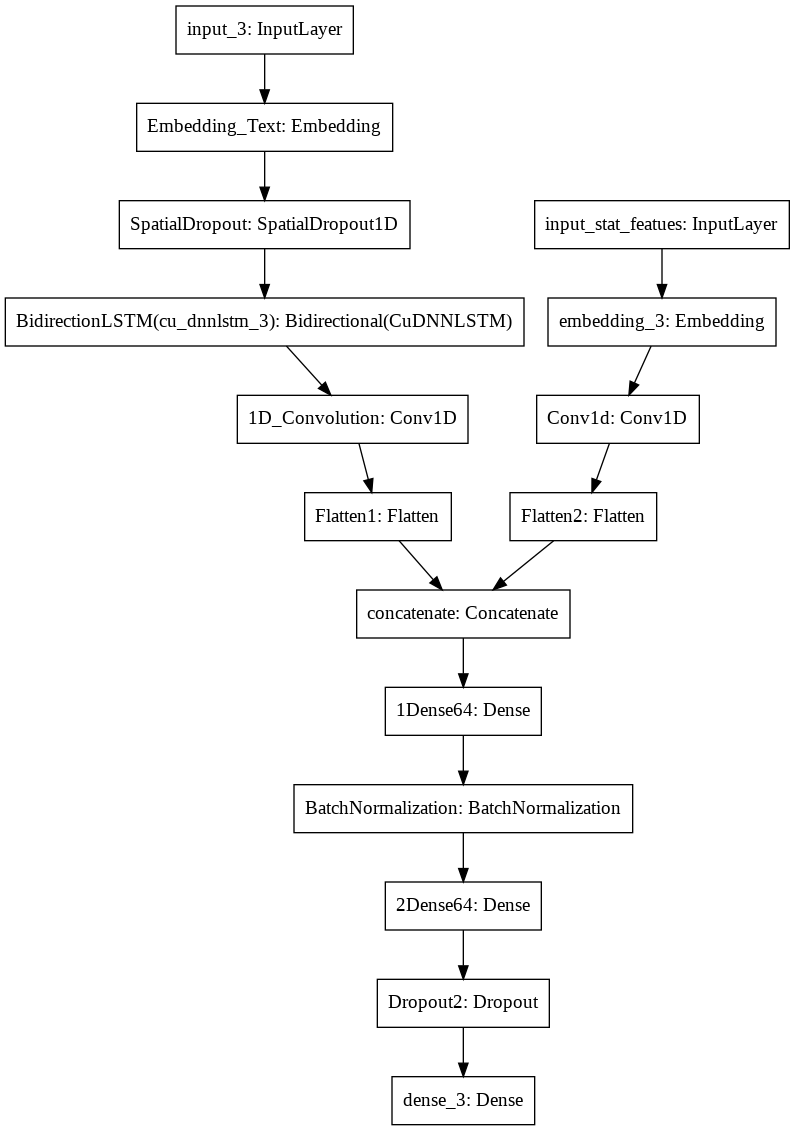

In [40]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png')


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
learning_rate = 0.001
adam = optimizers.Adam(lr=learning_rate) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])

In [43]:
model.fit([train_padded_docs, X_train_stat], 
          y_train, 
          batch_size=512, epochs=4, 
          validation_data=([cv_padded_docs, X_cv_stat], 
            y_test))


Train on 1044897 samples, validate on 261225 samples
Epoch 1/4
1044897/1044897 [==============================] - 239s 228us/step - loss: 0.1226 - acc: 0.9529 - f1_m: 0.5593 - precision_m: 0.6638 - recall_m: 0.4978 - val_loss: 0.1065 - val_acc: 0.9585 - val_f1_m: 0.6275 - val_precision_m: 0.6998 - val_recall_m: 0.5755
Epoch 2/4
1044897/1044897 [==============================] - 237s 227us/step - loss: 0.1034 - acc: 0.9592 - f1_m: 0.6360 - precision_m: 0.7060 - recall_m: 0.5871 - val_loss: 0.1006 - val_acc: 0.9595 - val_f1_m: 0.6160 - val_precision_m: 0.7365 - val_recall_m: 0.5355
Epoch 3/4
1044897/1044897 [==============================] - 238s 228us/step - loss: 0.0972 - acc: 0.9611 - f1_m: 0.6590 - precision_m: 0.7186 - recall_m: 0.6168 - val_loss: 0.0979 - val_acc: 0.9605 - val_f1_m: 0.6551 - val_precision_m: 0.7053 - val_recall_m: 0.6179
Epoch 4/4
1044897/1044897 [==============================] - 239s 229us/step - loss: 0.0917 - acc: 0.9629 - f1_m: 0.6796 - precision_m: 0.7252 - r

In [44]:
cv_pred1 = model.predict([cv_padded_docs, X_cv_stat], batch_size=100, verbose=1)

261225/261225 [==============================] - 32s 124us/step


In [45]:
test_pred1 = model.predict([test_padded_docs, test_data], batch_size=100, verbose=1)

375806/375806 [==============================] - 46s 123us/step


In [46]:
# https://www.kaggle.com/shujian/blend-of-lstm-and-cnn-with-4-embeddings-1200d
from sklearn.metrics import f1_score
pred_val_y = cv_pred1  # two random numbers :)
pred_test_y = y_test 

thresholds = []
for thresh in np.arange(0.1, 0.601, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y_test, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.5943010011754692
F1 score at threshold 0.11 is 0.6033975554174436
F1 score at threshold 0.12 is 0.6107263513513513
F1 score at threshold 0.13 is 0.6179012080306091
F1 score at threshold 0.14 is 0.6240366772186442
F1 score at threshold 0.15 is 0.6296607917810645
F1 score at threshold 0.16 is 0.6349184965647312
F1 score at threshold 0.17 is 0.6400746336579595
F1 score at threshold 0.18 is 0.6445576271577056
F1 score at threshold 0.19 is 0.6492337120063449
F1 score at threshold 0.2 is 0.6542396106504123
F1 score at threshold 0.21 is 0.6579054263936346
F1 score at threshold 0.22 is 0.6610476489482454
F1 score at threshold 0.23 is 0.6636738478054016
F1 score at threshold 0.24 is 0.6662230765439402
F1 score at threshold 0.25 is 0.6692391953794066
F1 score at threshold 0.26 is 0.6715735530546625
F1 score at threshold 0.27 is 0.6731685074475632
F1 score at threshold 0.28 is 0.6753684640731565
F1 score at threshold 0.29 is 0.6777242640430629
F1 score at threshold 

In [0]:
y_pred2 = (pred1 > best_thresh).astype(int)


In [51]:
score = f1_score(y_test, y_pred2)
print (score)

0.6797984161267098


**** Confusion Matrix ******
[[238303   6760]
 [  4359  11803]]
**** Precision Matrix ******
[[0.98203674 0.36416528]
 [0.01796326 0.63583472]]
**** Recall Matrix ******
[[0.97241526 0.02758474]
 [0.26970672 0.73029328]]


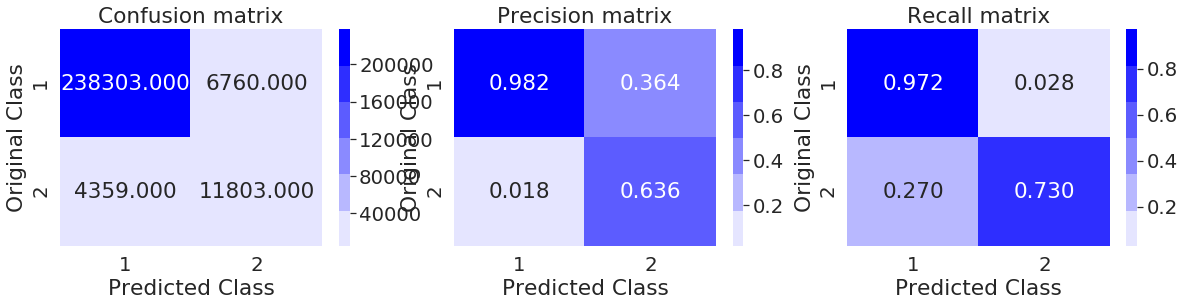

In [52]:
plot_confusion_matrix(y_test, y_pred2)

With 3 Embeddings

In [48]:
input1 = Input(shape=(70,)) 
#input1 = Input(shape=(100,), name = 'Input_sequence_Text')
embedding = Embedding(max_features, 300 * 3, weights=[embedding_matrix], input_length= 70,  trainable=False, name = 'Embedding_Text')(input1)
dropout = SpatialDropout1D(0.4, name='SpatialDropout')(embedding)
bidirectionLSTM = Bidirectional(CuDNNLSTM(256, return_sequences=True), name= 'BidirectionLSTM')(dropout)
bidirectionLSTM2 = Bidirectional(CuDNNGRU(128, return_sequences=True), name= 'BidirectionLSTM2')(bidirectionLSTM)
conv11 = Conv1D(64, kernel_size= 3, name='1D_Convolution')(bidirectionLSTM2)
#max_pool = GlobalMaxPooling1D()(conv11)
flattan1 = Flatten(name= 'Flatten1')(conv11)

input2 = Input(shape=(21,), name = 'input_stat_featues') 
embed2 = Embedding(21, 50)(input2)
conv2 = Conv1D(64, kernel_size= 3, activation='relu', kernel_regularizer= regularizers.l2(0.002), name='Conv1d')(embed2) 
flatten2 = Flatten(name='Flatten2')(conv2)

merge = concatenate([flattan1, flatten2], name='concatenate')
dense64 = Dense(64, activation="relu", name='1Dense64')(merge)
batchnormal = BatchNormalization(name='BatchNormalization')(dense64)
dense3 = Dense(64, activation="relu", name='2Dense64')(batchnormal)
dropout2 = Dropout(0.1, name='Dropout2')(dense3)

final = Dense(1, activation="sigmoid")(dropout2)
model2 = Model(inputs=[input1, input2], outputs=final)
print (model2.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 70)           0                                            
__________________________________________________________________________________________________
Embedding_Text (Embedding)      (None, 70, 900)      126000000   input_5[0][0]                    
__________________________________________________________________________________________________
SpatialDropout (SpatialDropout1 (None, 70, 900)      0           Embedding_Text[0][0]             
__________________________________________________________________________________________________
BidirectionLSTM (Bidirectional) (None, 70, 512)      2371584     SpatialDropout[0][0]             
____________________________________________________________________________________________

In [0]:
learning_rate = 0.001
adam = optimizers.Adam(lr=learning_rate) 
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])

In [51]:
model2.fit([train_padded_docs, X_train_stat], 
          y_train, 
          batch_size=512, epochs=4, 
          validation_data=([cv_padded_docs, X_cv_stat], 
            y_test))

Train on 1044897 samples, validate on 261225 samples
Epoch 1/4
1044897/1044897 [==============================] - 310s 297us/step - loss: 0.1223 - acc: 0.9534 - f1_m: 0.5693 - precision_m: 0.6705 - recall_m: 0.5086 - val_loss: 0.1073 - val_acc: 0.9590 - val_f1_m: 0.6362 - val_precision_m: 0.6999 - val_recall_m: 0.5900
Epoch 2/4
1044897/1044897 [==============================] - 308s 295us/step - loss: 0.1025 - acc: 0.9594 - f1_m: 0.6385 - precision_m: 0.7085 - recall_m: 0.5890 - val_loss: 0.1121 - val_acc: 0.9590 - val_f1_m: 0.5894 - val_precision_m: 0.7657 - val_recall_m: 0.4853
Epoch 3/4
1044897/1044897 [==============================] - 308s 295us/step - loss: 0.0960 - acc: 0.9615 - f1_m: 0.6636 - precision_m: 0.7179 - recall_m: 0.6252 - val_loss: 0.1020 - val_acc: 0.9609 - val_f1_m: 0.6656 - val_precision_m: 0.7003 - val_recall_m: 0.6409
Epoch 4/4
1044897/1044897 [==============================] - 308s 295us/step - loss: 0.0901 - acc: 0.9636 - f1_m: 0.6872 - precision_m: 0.7309 - r

In [52]:
cv_pred2 = model2.predict([cv_padded_docs, X_cv_stat], batch_size=100, verbose=1)

261225/261225 [==============================] - 48s 182us/step


In [53]:
test_pred2 = model2.predict([test_padded_docs, test_data], batch_size=100, verbose=1)

375806/375806 [==============================] - 68s 180us/step


In [54]:
pred_val_y = cv_pred2  # two random numbers :)
pred_test_y = y_test 

thresholds = []
for thresh in np.arange(0.1, 0.601, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y_test, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.5713628698451633
F1 score at threshold 0.11 is 0.5794902794298304
F1 score at threshold 0.12 is 0.5874392300823496
F1 score at threshold 0.13 is 0.5934455270150575
F1 score at threshold 0.14 is 0.5999713871119376
F1 score at threshold 0.15 is 0.6058583303965671
F1 score at threshold 0.16 is 0.6120457604306865
F1 score at threshold 0.17 is 0.6169425179764285
F1 score at threshold 0.18 is 0.6223428312980552
F1 score at threshold 0.19 is 0.6276125095347064
F1 score at threshold 0.2 is 0.6320523844169589
F1 score at threshold 0.21 is 0.6356323119777159
F1 score at threshold 0.22 is 0.6384913133495363
F1 score at threshold 0.23 is 0.6422902881051459
F1 score at threshold 0.24 is 0.6452338852274553
F1 score at threshold 0.25 is 0.6488392049539625
F1 score at threshold 0.26 is 0.6517631652792067
F1 score at threshold 0.27 is 0.6549599943354811
F1 score at threshold 0.28 is 0.6580934009668739
F1 score at threshold 0.29 is 0.6599289418091031
F1 score at threshold 

In [57]:
pred_val_y = 0.6 * cv_pred1 + 0.4 * cv_pred2  # two random numbers :)
pred_test_y = 0.6 * test_pred1 + 0.4 * test_pred2 

thresholds = []
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y_test, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.5830678108567742
F1 score at threshold 0.11 is 0.5927360581434817
F1 score at threshold 0.12 is 0.6006795385648308
F1 score at threshold 0.13 is 0.6086415915449176
F1 score at threshold 0.14 is 0.6155529832684415
F1 score at threshold 0.15 is 0.6216816996537426
F1 score at threshold 0.16 is 0.6276406541447968
F1 score at threshold 0.17 is 0.6331479323762834
F1 score at threshold 0.18 is 0.6383993226532386
F1 score at threshold 0.19 is 0.6431020481819002
F1 score at threshold 0.2 is 0.6479053405820274
F1 score at threshold 0.21 is 0.6527421182892698
F1 score at threshold 0.22 is 0.6569390857009236
F1 score at threshold 0.23 is 0.6601304101304102
F1 score at threshold 0.24 is 0.6631985873144658
F1 score at threshold 0.25 is 0.6667791788219978
F1 score at threshold 0.26 is 0.6698806915023131
F1 score at threshold 0.27 is 0.6719610542879622
F1 score at threshold 0.28 is 0.6743325468769402
F1 score at threshold 0.29 is 0.6764897509146494
F1 score at threshold 

Only Text Data

In [60]:
input1 = Input(shape=(70,)) 
#input1 = Input(shape=(100,), name = 'Input_sequence_Text')
embedding = Embedding(max_features, 300 * 2, weights=[embedding_matrix], input_length= 70,  trainable=False, name = 'Embedding_Text')(input1)
dropout = SpatialDropout1D(0.4, name='SpatialDropout')(embedding)
bidirectionLSTM = Bidirectional(CuDNNLSTM(256, return_sequences=True), name= 'BidirectionLSTM')(dropout)
bidirectionLSTM2 = Bidirectional(CuDNNLSTM(128, return_sequences=True), name= 'BidirectionLSTM2')(bidirectionLSTM)
conv11 = Conv1D(64, kernel_size= 3, name='1D_Convolution')(bidirectionLSTM2)
#max_pool = GlobalMaxPooling1D()(conv11)
flattan1 = Flatten(name= 'Flatten1')(conv11)

input2 = Input(shape=(21,), name = 'input_stat_featues') 
embed2 = Embedding(21, 50)(input2)
conv2 = Conv1D(64, kernel_size= 3, activation='relu', kernel_regularizer= regularizers.l2(0.002), name='Conv1d')(embed2) 
flatten2 = Flatten(name='Flatten2')(conv2)

merge = concatenate([flattan1, flatten2], name='concatenate')
dense64 = Dense(64, activation="relu", name='1Dense64')(merge)
batchnormal = BatchNormalization(name='BatchNormalization')(dense64)
dense3 = Dense(64, activation="relu", name='2Dense64')(batchnormal)
dropout2 = Dropout(0.1, name='Dropout2')(dense3)

final = Dense(1, activation="sigmoid")(dropout2)
model2 = Model(inputs=[input1, input2], outputs=final)
print (model2.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 70)           0                                            
__________________________________________________________________________________________________
Embedding_Text (Embedding)      (None, 70, 600)      72000000    input_4[0][0]                    
__________________________________________________________________________________________________
SpatialDropout (SpatialDropout1 (None, 70, 600)      0           Embedding_Text[0][0]             
__________________________________________________________________________________________________
BidirectionLSTM (Bidirectional) (None, 70, 512)      1757184     SpatialDropout[0][0]             
____________________________________________________________________________________________

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])

In [62]:
model2.fit([train_padded_docs, X_train_stat ], 
          y_train, 
          batch_size=100, epochs=4, 
          validation_data=([cv_padded_docs, X_cv_stat], 
            y_test))

Train on 1044897 samples, validate on 261225 samples
Epoch 1/4
1044897/1044897 [==============================] - 1522s 1ms/step - loss: 0.1171 - acc: 0.9545 - f1_m: 0.5563 - precision_m: 0.6691 - recall_m: 0.5175 - val_loss: 0.1029 - val_acc: 0.9590 - val_f1_m: 0.6300 - val_precision_m: 0.6834 - val_recall_m: 0.6239
Epoch 2/4
1044897/1044897 [==============================] - 1516s 1ms/step - loss: 0.1021 - acc: 0.9594 - f1_m: 0.6187 - precision_m: 0.7070 - recall_m: 0.5882 - val_loss: 0.0993 - val_acc: 0.9601 - val_f1_m: 0.6231 - val_precision_m: 0.7138 - val_recall_m: 0.5896
Epoch 3/4
1044897/1044897 [==============================] - 1515s 1ms/step - loss: 0.0965 - acc: 0.9614 - f1_m: 0.6425 - precision_m: 0.7181 - recall_m: 0.6175 - val_loss: 0.0972 - val_acc: 0.9610 - val_f1_m: 0.6413 - val_precision_m: 0.7080 - val_recall_m: 0.6234
Epoch 4/4
1044897/1044897 [==============================] - 1515s 1ms/step - loss: 0.0922 - acc: 0.9630 - f1_m: 0.6616 - precision_m: 0.7284 - recal

In [65]:
pred2 = model.predict([cv_padded_docs, X_cv_stat], batch_size=100, verbose=1)

261225/261225 [==============================] - 91s 346us/step


In [66]:
from sklearn.metrics import f1_score
pred_val_y = pred2  # two random numbers :)
pred_test_y = y_test 

thresholds = []
for thresh in np.arange(0.1, 0.601, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y_test, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.6211583011583012
F1 score at threshold 0.11 is 0.627081045956665
F1 score at threshold 0.12 is 0.6317869064650181
F1 score at threshold 0.13 is 0.6367104900248229
F1 score at threshold 0.14 is 0.6399404706538927
F1 score at threshold 0.15 is 0.6424877773599098
F1 score at threshold 0.16 is 0.6459828003991068
F1 score at threshold 0.17 is 0.6490676522114761
F1 score at threshold 0.18 is 0.6518913676042677
F1 score at threshold 0.19 is 0.6545854732208365
F1 score at threshold 0.2 is 0.6578778452574928
F1 score at threshold 0.21 is 0.6597933009587847
F1 score at threshold 0.22 is 0.6617107840675072
F1 score at threshold 0.23 is 0.6632725430597771
F1 score at threshold 0.24 is 0.664624964908251
F1 score at threshold 0.25 is 0.6664264944288619
F1 score at threshold 0.26 is 0.6680328932008612
F1 score at threshold 0.27 is 0.6693314523081746
F1 score at threshold 0.28 is 0.6714767221402991
F1 score at threshold 0.29 is 0.6719728324312851
F1 score at threshold 0.

In [0]:
y_pred2 = (pred2 > best_thresh).astype(int)

In [0]:
score = f1_score(y_test, y_pred2)
print (score)

0.6904768857868762


**** Confusion Matrix ******
[[238804   6259]
 [  4340  11822]]
**** Precision Matrix ******
[[0.9821505  0.34616448]
 [0.0178495  0.65383552]]
**** Recall Matrix ******
[[0.97445963 0.02554037]
 [0.26853112 0.73146888]]


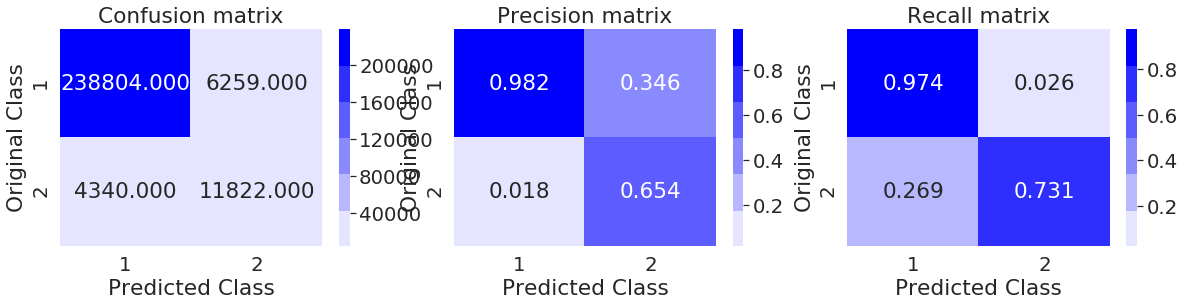

In [0]:
plot_confusion_matrix(y_test, y_pred2)

In [63]:
input1 = Input(shape=(70,)) 
#input1 = Input(shape=(100,), name = 'Input_sequence_Text')
embedding = Embedding(max_features, 300 * 3, weights=[embedding_matrix], input_length= 70,  trainable=False, name = 'Embedding_Text')(input1)
#dropout = SpatialDropout1D(0.4, name='SpatialDropout')(embedding)
bidirectionLSTM = Bidirectional(CuDNNLSTM(256, return_sequences=True), name= 'BidirectionLSTM')(embedding)
dropout = SpatialDropout1D(0.4, name='SpatialDropout')(bidirectionLSTM)

bidirectionLSTM2 = Bidirectional(CuDNNLSTM(128, return_sequences=True), name= 'BidirectionLSTM2')(dropout)
conv11 = Conv1D(128, kernel_size= 4, name='1D_Convolution')(bidirectionLSTM2)

flattan1 = Flatten(name= 'Flatten1')(conv11)

input2 = Input(shape=(21,), name = 'input_stat_featues') 
embed2 = Embedding(21, 50)(input2)
conv2 = Conv1D(64, kernel_size= 3, activation='relu', kernel_regularizer= regularizers.l2(0.002), name='Conv1d')(embed2) 
flatten2 = Flatten(name='Flatten2')(conv2)

merge = concatenate([flattan1, flatten2], name='concatenate')
dense64 = Dense(128, activation="relu", name='1Dense64')(merge)
batchnormal = BatchNormalization(name='BatchNormalization')(dense64)
dense3 = Dense(64, activation="relu", name='2Dense64')(batchnormal)
dropout2 = Dropout(0.1, name='Dropout2')(dense3)

final = Dense(1, activation="sigmoid")(dropout2)
model3 = Model(inputs=[input1, input2], outputs=final)
print (model3.summary())

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 70)           0                                            
__________________________________________________________________________________________________
Embedding_Text (Embedding)      (None, 70, 900)      126000000   input_8[0][0]                    
__________________________________________________________________________________________________
BidirectionLSTM (Bidirectional) (None, 70, 512)      2371584     Embedding_Text[0][0]             
__________________________________________________________________________________________________
SpatialDropout (SpatialDropout1 (None, 70, 512)      0           BidirectionLSTM[0][0]            
____________________________________________________________________________________________

In [0]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m,precision_m, recall_m])

In [65]:
model3.fit([train_padded_docs, X_train_stat ], 
          y_train, 
          batch_size=100, epochs=5, 
          validation_data=([cv_padded_docs, X_cv_stat], 
            y_test))

Train on 1044897 samples, validate on 261225 samples
Epoch 1/5
1044897/1044897 [==============================] - 612s 586us/step - loss: 0.1155 - acc: 0.9548 - f1_m: 0.5684 - precision_m: 0.6713 - recall_m: 0.5346 - val_loss: 0.1032 - val_acc: 0.9586 - val_f1_m: 0.5806 - val_precision_m: 0.7224 - val_recall_m: 0.5209
Epoch 2/5
1044897/1044897 [==============================] - 601s 575us/step - loss: 0.0996 - acc: 0.9604 - f1_m: 0.6317 - precision_m: 0.7133 - recall_m: 0.6033 - val_loss: 0.0992 - val_acc: 0.9600 - val_f1_m: 0.6066 - val_precision_m: 0.7246 - val_recall_m: 0.5596
Epoch 3/5
1044897/1044897 [==============================] - 600s 574us/step - loss: 0.0909 - acc: 0.9633 - f1_m: 0.6654 - precision_m: 0.7299 - recall_m: 0.6485 - val_loss: 0.0979 - val_acc: 0.9605 - val_f1_m: 0.6302 - val_precision_m: 0.7032 - val_recall_m: 0.6090
Epoch 4/5
1044897/1044897 [==============================] - 600s 574us/step - loss: 0.0825 - acc: 0.9666 - f1_m: 0.7018 - precision_m: 0.7485 - r

In [0]:
pred2 = model.predict([test_padded_docs, X_test_stat], batch_size=100, verbose=1)

261225/261225 [==============================] - 47s 182us/step


In [0]:
from sklearn.metrics import f1_score
pred_val_y = pred2  # two random numbers :)
pred_test_y = y_test 

thresholds = []
for thresh in np.arange(0.1, 0.601, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y_test, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.6315145195293904
F1 score at threshold 0.11 is 0.6378709960104236
F1 score at threshold 0.12 is 0.643541398290198
F1 score at threshold 0.13 is 0.6477755872782119
F1 score at threshold 0.14 is 0.6517102229054573
F1 score at threshold 0.15 is 0.6545207209833358
F1 score at threshold 0.16 is 0.6573316628589677
F1 score at threshold 0.17 is 0.6601782655113341
F1 score at threshold 0.18 is 0.6620713856025666
F1 score at threshold 0.19 is 0.6645051799690975
F1 score at threshold 0.2 is 0.6664962944032712
F1 score at threshold 0.21 is 0.6685223845975412
F1 score at threshold 0.22 is 0.6696632716690916
F1 score at threshold 0.23 is 0.6711546521374686
F1 score at threshold 0.24 is 0.672421530582614
F1 score at threshold 0.25 is 0.6734422391315915
F1 score at threshold 0.26 is 0.6742572400675114
F1 score at threshold 0.27 is 0.675356921166977
F1 score at threshold 0.28 is 0.6769649170519445
F1 score at threshold 0.29 is 0.6775413970830135
F1 score at threshold 0.3

In [0]:
y_pred2 = (pred2 > best_thresh).astype(int)
score = f1_score(y_test, y_pred2)
print (score)

0.6802963465671304


**** Confusion Matrix ******
[[237890   7173]
 [  4133  12029]]
**** Precision Matrix ******
[[0.98292311 0.37355484]
 [0.01707689 0.62644516]]
**** Recall Matrix ******
[[0.97072998 0.02927002]
 [0.2557233  0.7442767 ]]


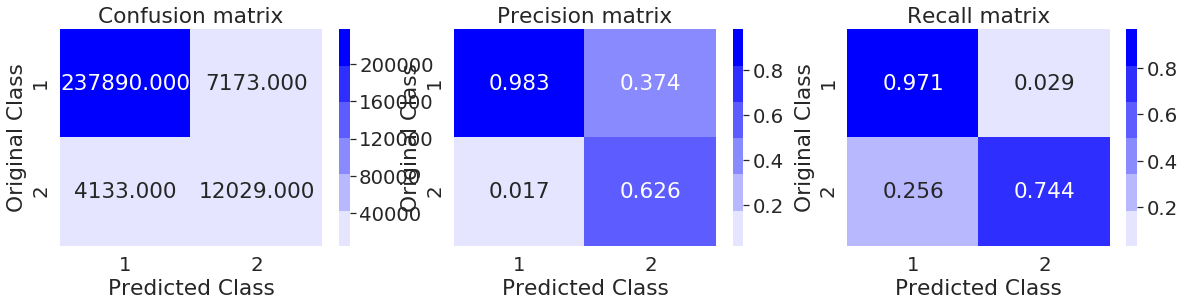

In [0]:
plot_confusion_matrix(y_test, y_pred2)

In [0]:
# https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb
from keras.engine.topology import Layer

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [71]:
inp = Input(shape=(70,))
x = Embedding(max_features, 300 * 3, weights=[embedding_matrix])(inp)
x = SpatialDropout1D(0.4)(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
x = Attention(70)(x)
x = Dense(64, activation="relu")(x)
x = Dense(1, activation="sigmoid")(x)
model4 = Model(inputs=inp, outputs=x)
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m] )

ValueError: ignored

In [70]:
model4.fit(train_padded_docs, y_train, batch_size=256, epochs=4, validation_data=(cv_padded_docs, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:421: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 126000000 elements. This may consume a large amount of memory.
  num_elements)


Train on 1044897 samples, validate on 261225 samples
Epoch 1/4
1044897/1044897 [==============================] - 402s 385us/step - loss: 0.1097 - acc: 0.9566 - f1_m: 0.5918 - precision_m: 0.6882 - recall_m: 0.5381 - val_loss: 0.1000 - val_acc: 0.9595 - val_f1_m: 0.6555 - val_precision_m: 0.6834 - val_recall_m: 0.6441
Epoch 2/4
1044897/1044897 [==============================] - 394s 377us/step - loss: 0.0902 - acc: 0.9640 - f1_m: 0.6853 - precision_m: 0.7357 - recall_m: 0.6569 - val_loss: 0.0995 - val_acc: 0.9603 - val_f1_m: 0.6449 - val_precision_m: 0.7118 - val_recall_m: 0.6035
Epoch 3/4
1044897/1044897 [==============================] - 391s 374us/step - loss: 0.0766 - acc: 0.9697 - f1_m: 0.7390 - precision_m: 0.7747 - recall_m: 0.7197 - val_loss: 0.1038 - val_acc: 0.9590 - val_f1_m: 0.6463 - val_precision_m: 0.6840 - val_recall_m: 0.6272
Epoch 4/4
1044897/1044897 [==============================] - 392s 375us/step - loss: 0.0634 - acc: 0.9752 - f1_m: 0.7876 - precision_m: 0.8182 - r

In [0]:
65.36

In [0]:
model.fit(train_padded_docs, y_train, batch_size=512, epochs=5, validation_data=(test_padded_docs, y_test))

Train on 1044897 samples, validate on 261225 samples
Epoch 1/5
1044897/1044897 [==============================] - 213s 204us/step - loss: 0.1135 - acc: 0.9554 - f1_m: 0.5811 - precision_m: 0.6792 - recall_m: 0.5214 - val_loss: 0.1014 - val_acc: 0.9594 - val_f1_m: 0.6263 - val_precision_m: 0.7192 - val_recall_m: 0.5612
Epoch 2/5
1044897/1044897 [==============================] - 209s 200us/step - loss: 0.0946 - acc: 0.9621 - f1_m: 0.6675 - precision_m: 0.7246 - recall_m: 0.6275 - val_loss: 0.0983 - val_acc: 0.9607 - val_f1_m: 0.6512 - val_precision_m: 0.7147 - val_recall_m: 0.6048
Epoch 3/5
1044897/1044897 [==============================] - 209s 200us/step - loss: 0.0841 - acc: 0.9663 - f1_m: 0.7111 - precision_m: 0.7490 - recall_m: 0.6848 - val_loss: 0.1015 - val_acc: 0.9604 - val_f1_m: 0.6422 - val_precision_m: 0.7209 - val_recall_m: 0.5856
Epoch 4/5
1044897/1044897 [==============================] - 209s 200us/step - loss: 0.0742 - acc: 0.9704 - f1_m: 0.7493 - precision_m: 0.7797 - r

In [0]:
pred1 = model.predict([test_padded_docs], batch_size=512, verbose=1)

261225/261225 [==============================] - 14s 54us/step


In [0]:
from sklearn.metrics import f1_score
pred_val_y = pred1  # two random numbers :)
pred_test_y = y_test 

thresholds = []
for thresh in np.arange(0.1, 0.601, 0.01):
    thresh = np.round(thresh, 2)
    res = f1_score(y_test, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.6325585789871504
F1 score at threshold 0.11 is 0.6367865707434053
F1 score at threshold 0.12 is 0.6407153618117315
F1 score at threshold 0.13 is 0.6439259696790707
F1 score at threshold 0.14 is 0.6471218272847287
F1 score at threshold 0.15 is 0.6495528404081119
F1 score at threshold 0.16 is 0.6522956326987682
F1 score at threshold 0.17 is 0.6542584642278721
F1 score at threshold 0.18 is 0.6562410850903809
F1 score at threshold 0.19 is 0.657688988834558
F1 score at threshold 0.2 is 0.6586845297747771
F1 score at threshold 0.21 is 0.659475543983634
F1 score at threshold 0.22 is 0.6603677631755038
F1 score at threshold 0.23 is 0.661596137767349
F1 score at threshold 0.24 is 0.6631547505905994
F1 score at threshold 0.25 is 0.6641888937472672
F1 score at threshold 0.26 is 0.6652371134020618
F1 score at threshold 0.27 is 0.6660207076020155
F1 score at threshold 0.28 is 0.6657005907925537
F1 score at threshold 0.29 is 0.6666853476055707
F1 score at threshold 0.3

In [0]:
y_pred2 = (pred1 > best_thresh).astype(int)


In [0]:
score = f1_score(y_test, y_pred2)
print (score)

0.6687501792011928


**** Confusion Matrix ******
[[238010   7053]
 [  4500  11662]]
**** Precision Matrix ******
[[0.98144406 0.37686348]
 [0.01855594 0.62313652]]
**** Recall Matrix ******
[[0.97121965 0.02878035]
 [0.27843089 0.72156911]]


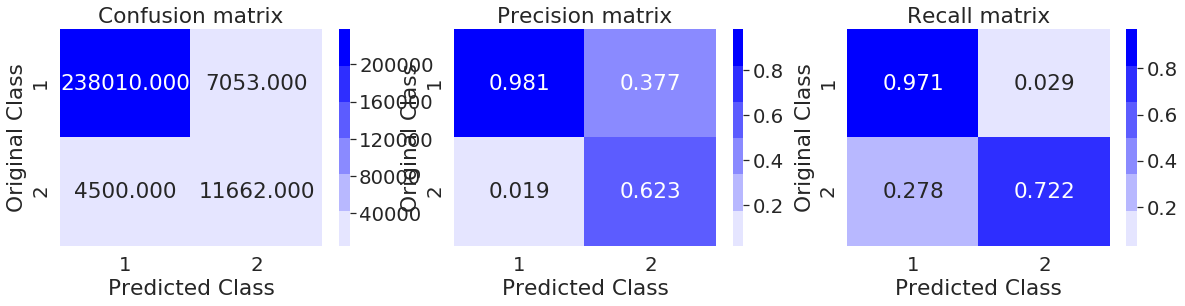

In [0]:
plot_confusion_matrix(y_test, y_pred2)

In [2]:
inp = Input(shape=(70,))
x = Embedding(max_features, 300 * 2, weights=[embedding_matrix1])(inp)
x = SpatialDropout1D(0.4)(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(32, activation="relu")(conc)
x = Dropout(0.2)(x)
x = Dense(1, activation="sigmoid")(x)
model5 = Model(inputs=inp, outputs=x)
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

NameError: ignored

In [3]:
model5.fit(train_padded_docs, y_train, batch_size=256, epochs=4, validation_data=(cv_padded_docs, y_test))

NameError: ignored

In [0]:
# 66.29
# 65.52
# 66.63

#### TFIDF-Vectoriztion

In [0]:
pd.to_pickle(X_train_TFIDF, 'X_train_TFIDF.pkl')
pd.to_pickle(X_test_TFIDF, 'X_test_TFIDF.pkl')
#X_test_TFIDF.to_pickle('X_test_TFIDF.pkl')

### BOW-Vectoriazation

In [0]:

vectorizer = CountVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 2),
        max_features=20000)
vectorizer.fit(X_train['question_text'])
X_train_BOW = vectorizer.transform(X_train['question_text'])
X_test_BOW = vectorizer.transform(X_test['question_text'])

print("Shape of matrix after BOW encodig ",X_train_BOW.shape)
print("Shape of matrix after BOW encodig ",X_test_BOW.shape)

Shape of matrix after BOW encodig  (1044897, 20000)
Shape of matrix after BOW encodig  (261225, 20000)


In [0]:
from scipy.sparse import hstack
import pickle
X_train_BOW = hstack((X_train.drop(['question_text'], axis = 1), X_train_BOW)).tocsr()
X_test_BOW = hstack((X_test.drop(['question_text'], axis = 1), X_test_BOW)).tocsr()
 
print (X_train_BOW.shape)
print (X_test_BOW.shape)
pd.to_pickle(X_train_TFIDF, 'X_train_BOW.pkl')
pd.to_pickle(X_test_TFIDF, 'X_test_BOW.pkl')
#X_test_TFIDF.to_pickle('X_test_TFIDF.pkl')
X_train_BOW

(1044897, 20042)
(261225, 20042)


<1044897x20042 sparse matrix of type '<class 'numpy.float64'>'
	with 49990590 stored elements in Compressed Sparse Row format>

#### Glove-Vectorization

In [0]:
pd.to_pickle(X_train_avg_w2v, 'X_train_w2v_75.pkl')
pd.to_pickle(X_test_avg_w2v, 'X_test_w2v_25.pkl')
#X_test_TFIDF.to_pickle('X_test_TFIDF.pkl')
X_train_avg_w2v

In [0]:
X_train = pd.read_pickle('X_train_w2v_75.pkl')
X_test = pd.read_pickle('X_test_w2v_25.pkl')


#### Google New Vectorizer

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [0]:
words_google = set(dic)
X_train_avg_w2v_google = []; # the avg-w2v for each sentence/review is stored in this list

for sentence in tqdm(X_train['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_google:
            vector += word2vec[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_google.append(vector)

print(len(X_train_avg_w2v_google))
print(len(X_train_avg_w2v_google[0]))

100%|███████████████████████████████████████████████████████████████████████| 750000/750000 [00:40<00:00, 18534.56it/s]


750000
300


In [0]:
words_google = set(dic)
X_test_avg_w2v_google = []; # the avg-w2v for each sentence/review is stored in this list

for sentence in tqdm(X_test['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_google:
            vector += word2vec[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_google.append(vector)

print(len(X_test_avg_w2v_google))
print(len(X_test_avg_w2v_google[0]))

100%|███████████████████████████████████████████████████████████████████████| 250000/250000 [00:12<00:00, 19618.96it/s]


250000
300


In [0]:
import pickle
type(X_test_avg_w2v_google)
file_google = open("google_train.pkl", 'wb')
pickle.dump(X_train_avg_w2v_google,file_google)

In [0]:

file_google = open("google_test.pkl", 'wb')
pickle.dump(X_test_avg_w2v_google,file_google)

In [0]:
from scipy.sparse import hstack
import pickle
X_train_google = hstack((X_train.drop(['question_text'], axis = 1), X_train_avg_w2v_google)).tocsr()
X_test_google = hstack((X_test.drop(['question_text'], axis = 1), X_test_avg_w2v_google)).tocsr()
 
print (X_train_google.shape)
print (X_test_google.shape)
pd.to_pickle(X_train_google, 'X_train_google75.pkl')
pd.to_pickle(X_test_google, 'X_test_google25.pkl')
#X_test_TFIDF.to_pickle('X_test_TFIDF.pkl')
X_train_google

In [0]:
X_train_google.shape

(1044897, 321)

#### Paragram 300 Vectorizer

In [0]:
#glove vector read file in python https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
def loadParagramModel(paragramFile):
    print ("Loading Paragram Model")
    f = open(paragramFile,'r', encoding="utf8", errors='ignore')
    model = {}
    for line in tqdm(f):
        splitLine = line.split(" ")
        word = splitLine[0]
        
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
paragram_model = loadParagramModel('paragram_300_sl999/paragram_300_sl999.txt')

Loading Paragram Model


1703756it [03:35, 7892.81it/s] 


Done. 1703755  words loaded!


In [0]:
paragram_model = []

In [0]:
X_train_avg_paragram_vectors = []; # the avg-w2v for each sentence/review is stored in this list
paragram_words = set(paragram_model.keys())
for sentence in tqdm(X_train['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in paragram_words:
            vector += paragram_model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_paragram_vectors.append(vector)

print(len(X_train_avg_paragram_vectors))
print(len(X_train_avg_paragram_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 750000/750000 [01:05<00:00, 11443.02it/s]


750000
300


In [0]:
X_test_avg_paragram_vectors = []; # the avg-w2v for each sentence/review is stored in this list
paragram_words = set(paragram_model.keys())
for sentence in tqdm(X_test['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in paragram_words:
            vector += paragram_model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_paragram_vectors.append(vector)

print(len(X_test_avg_paragram_vectors))
print(len(X_test_avg_paragram_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 250000/250000 [00:09<00:00, 25626.44it/s]


250000
300


In [0]:
from scipy.sparse import hstack
import pickle
X_train_avg_paragram = hstack((X_train.drop(['question_text'], axis = 1), X_train_avg_paragram_vectors)).tocsr()
X_test_avg_paragram = hstack((X_test.drop(['question_text'], axis = 1), X_test_avg_paragram_vectors)).tocsr()
 
print (X_train_avg_paragram.shape)
print (X_test_avg_paragram.shape)
pd.to_pickle(X_train_avg_paragram, 'X_train_avg_paragram75.pkl')
pd.to_pickle(X_test_avg_paragram, 'X_test_avg_paragram25.pkl')

X_train_avg_paragram

(750000, 321)
(250000, 321)


<750000x321 sparse matrix of type '<class 'numpy.float64'>'
	with 240750000 stored elements in Compressed Sparse Row format>

In [0]:
X_train_avg_paragram = pd.read_pickle('X_train_avg_paragram.pkl')
X_test_avg_paragram = pd.read_pickle('X_test_avg_paragram.pkl')

print (y_train.shape)
print (y_test.shape)
print( X_train_avg_paragram.shape)
print (X_test_avg_paragram.shape)

(1044897,)
(261225,)
(1044897, 321)
(261225, 321)


#### Wiki vectorizer

In [0]:
print ("Hi")

Hi


In [0]:
wiki_model = []


### TFIDF Learn Models

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 2),
        max_features=20000)
vectorizer.fit(X_train['question_text'])
X_train_tfidf = vectorizer.transform(X_train['question_text'])
X_test_tfidf = vectorizer.transform(X_test['question_text'])

print("Shape of matrix after Tfidf encodig ",X_train_tfidf.shape)
print("Shape of matrix after Tfidf encodig ",X_test_tfidf.shape)

Shape of matrix after Tfidf encodig  (560000, 20000)
Shape of matrix after Tfidf encodig  (140000, 20000)


In [0]:
from scipy.sparse import hstack
import pickle
X_train_TFIDF = hstack((X_train.drop(['question_text'], axis = 1), X_train_tfidf)).tocsr()
X_test_TFIDF = hstack((X_test.drop(['question_text'], axis = 1), X_test_tfidf)).tocsr()
 
print (X_train_TFIDF.shape)
print (X_test_TFIDF.shape)

(560000, 20021)
(140000, 20021)


In [0]:
# Ranodm Model Score
# Train model
# Find f1-score
# Find confusion Matrix

# TFIDF 1. SVM, Random Forest, XGBoost
# Glove 1. SVM, XGBoost, Random Forest
# Paragram 1. SVM, XGBoost, Random Forest
# Wiki 1. SVM, XGBoost, Random Forest
# Google 1. SVM, XGBoost, Random Forest

# Deep Learning Model 
# GRU and LSTM


In [0]:
# Hypter parameters in randomsearchcv https://www.appliedaicourse.com/course/applied-ai-course-online/
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
f1 = make_scorer(f1_score , average='macro')

### SVM Model

In [0]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs= 4, random_state=10, scoring=f1, cv=5, n_iter= 10, verbose=10)
model.fit(X_train_TFIDF, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   33.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  8.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_di

In [0]:
model.best_params_

{'penalty': 'l1', 'alpha': 1e-07}

In [0]:
model.best_score_

0.7078129363805713

In [0]:
y_pred = model.predict(X_test_TFIDF)

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.6988327819517596
[[118181  13199]
 [  2129   6491]]


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    131380
           1       0.33      0.75      0.46      8620

    accuracy                           0.89    140000
   macro avg       0.66      0.83      0.70    140000
weighted avg       0.94      0.89      0.91    140000



**** Confusion Matrix ******
[[118181  13199]
 [  2129   6491]]
**** Precision Matrix ******
[[0.98230405 0.67034027]
 [0.01769595 0.32965973]]
**** Recall Matrix ******
[[0.8995357  0.1004643 ]
 [0.24698376 0.75301624]]


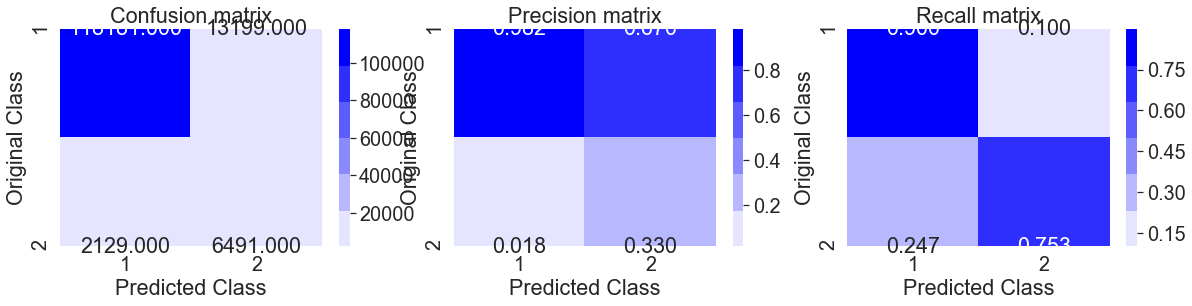

In [0]:
plot_confusion_matrix(y_test, y_pred)

### XGBoost Classifier

In [0]:
params = {
    "n_estimators": stats.randint(10, 300), 
    "max_depth": stats.randint(2, 10),    
    "learning_rate": stats.uniform(0.01, 1),
     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}        
    
xg = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0, reg_alpha= 1, scale_pos_weight=15.25)
model = RandomizedSearchCV(xg, params, scoring=f1,  cv=5, n_jobs= 3, random_state=12, n_iter= 10, verbose=10)
model.fit(X_train_TFIDF, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  9.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 19.2min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 25.2min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 29.5min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 37.8min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 48.5min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 66.2min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 73.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=1...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000153E32A1A90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.r

In [0]:
model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.45622174456752607,
 'max_depth': 7,
 'n_estimators': 251}

In [0]:
model.best_score_

0.7188174047982973

In [0]:
y_pred = model.predict(X_test_TFIDF)

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.7204262041687816
[[119369  12011]
 [  1823   6797]]


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95    131380
           1       0.36      0.79      0.50      8620

    accuracy                           0.90    140000
   macro avg       0.67      0.85      0.72    140000
weighted avg       0.95      0.90      0.92    140000



**** Confusion Matrix ******
[[119369  12011]
 [  1823   6797]]
**** Precision Matrix ******
[[0.98495775 0.63861123]
 [0.01504225 0.36138877]]
**** Recall Matrix ******
[[0.90857817 0.09142183]
 [0.21148492 0.78851508]]


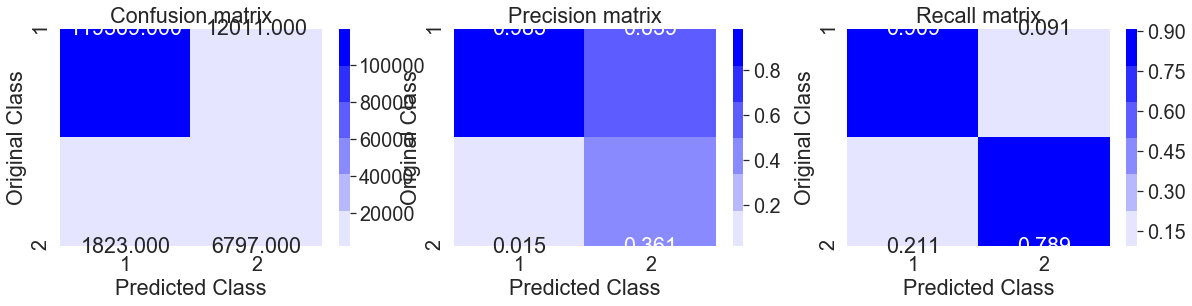

In [0]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools



plot_confusion_matrix(y_test, y_pred)

0.9175448256906047


In [0]:
model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', colsample_bytree=0.5, learning_rate=0.54, max_depth= 6, n_estimators=288, scale_pos_weight=15.25)
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)

In [0]:
score = f1_score(y_test,y_pred)
print (score)
print (confusion_matrix(y_test, y_pred))

0.49695916594265865
[[119240  12140]
 [  1756   6864]]


In [0]:

socre = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print (score)
print (confusion_matrix(y_test, y_pred))

0.49695916594265865
[[119240  12140]
 [  1756   6864]]


In [0]:
y_pred_train = model.predict(X_train_TFIDF)
print (y_pred_train)
y_pred = model.predict(X_test_TFIDF)
score = f1_score(y_test,y_pred)
print (score)
print (confusion_matrix(y_test, y_pred))

[0 0 0 ... 0 1 0]
0.49695916594265865
[[119240  12140]
 [  1756   6864]]


In [0]:
y_pred = model.predict(X_test_TFIDF)
score = f1_score(y_test,y_pred)
print (score)
print (confusion_matrix(y_test, y_pred))

0.44286031112378416
[[115426  15954]
 [  1631   6989]]


In [0]:


model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', colsample_bytree=0.4, learning_rate=0.44, max_depth= 9, n_estimators=293, scale_pos_weight=15.25)
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)


In [0]:
y_pred_train = model.predict(X_train_TFIDF)
f1_model1=f1_score(y_train, y_pred_train, average='weighted',labels=np.unique(y_pred))
f1_model1

0.9392313713715285

In [0]:
y_pred_train = model.predict(X_train_TFIDF)
f1_model1=f1_score(y_train, y_pred_train, average='micro')
f1_model1

0.9280946428571428

In [0]:
from sklearn.metrics import f1_score
f1_model1=f1_score(y_test,y_pred,average='weighted',labels=np.unique(y_pred))
f1_model1

0.9222188442047036

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[120464,  10916],
       [  1947,   6673]], dtype=int64)

### Random Forest

In [0]:
X_train_TFIDF.shape

(560000, 20021)

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


tuned_parameters = {
        "n_estimators": [1, 5, 10, 50, 100, 500], "max_depth": [1, 5, 10, 50, 100, 500]    
}

DT = RandomForestClassifier(criterion="gini", n_jobs= 6 , class_weight='balanced')
model = RandomizedSearchCV(DT, tuned_parameters, scoring='f1', cv=5, verbose = 10 )
model.fit(X_train_TFIDF, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=5, max_depth=100 ...................................
[CV] ....... n_estimators=5, max_depth=100, score=0.831, total=  12.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s remaining:    0.0s


[CV] n_estimators=5, max_depth=100 ...................................
[CV] ....... n_estimators=5, max_depth=100, score=0.839, total=  12.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.3s remaining:    0.0s


[CV] n_estimators=5, max_depth=100 ...................................
[CV] ....... n_estimators=5, max_depth=100, score=0.843, total=  11.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.9s remaining:    0.0s


[CV] n_estimators=5, max_depth=100 ...................................
[CV] ....... n_estimators=5, max_depth=100, score=0.821, total=  14.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   51.3s remaining:    0.0s


[CV] n_estimators=5, max_depth=100 ...................................
[CV] ....... n_estimators=5, max_depth=100, score=0.833, total=  11.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s


[CV] n_estimators=100, max_depth=50 ..................................
[CV] ...... n_estimators=100, max_depth=50, score=0.879, total= 1.0min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s


[CV] n_estimators=100, max_depth=50 ..................................
[CV] ...... n_estimators=100, max_depth=50, score=0.879, total=  59.3s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.1min remaining:    0.0s


[CV] n_estimators=100, max_depth=50 ..................................
[CV] ...... n_estimators=100, max_depth=50, score=0.877, total= 1.0min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.1min remaining:    0.0s


[CV] n_estimators=100, max_depth=50 ..................................
[CV] ...... n_estimators=100, max_depth=50, score=0.872, total= 1.0min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.1min remaining:    0.0s


[CV] n_estimators=100, max_depth=50 ..................................
[CV] ...... n_estimators=100, max_depth=50, score=0.876, total= 1.1min
[CV] n_estimators=100, max_depth=500 .................................
[CV] ..... n_estimators=100, max_depth=500, score=0.926, total=11.7min
[CV] n_estimators=100, max_depth=500 .................................
[CV] ..... n_estimators=100, max_depth=500, score=0.926, total=11.6min
[CV] n_estimators=100, max_depth=500 .................................
[CV] ..... n_estimators=100, max_depth=500, score=0.926, total=12.5min
[CV] n_estimators=100, max_depth=500 .................................
[CV] ..... n_estimators=100, max_depth=500, score=0.927, total=12.5min
[CV] n_estimators=100, max_depth=500 .................................
[CV] ..... n_estimators=100, max_depth=500, score=0.922, total=13.0min
[CV] n_estimators=100, max_depth=10 ..................................
[CV] ...... n_estimators=100, max_depth=10, score=0.829, total=  15.7s
[CV] n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 101.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_job

In [0]:
model.best_score_

0.9251413505630018

In [0]:
model.best_params_

{'n_estimators': 100, 'max_depth': 500}

In [0]:
y_pred = model.predict(X_test_TFIDF)
score = f1_score(y_test,y_pred)
print (score)
print (confusion_matrix(y_test, y_pred))

0.3957193434180881
[[130031   1349]
 [  6161   2459]]


In [0]:
socre = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print (score)
print (confusion_matrix(y_test, y_pred))

0.3957193434180881
[[130031   1349]
 [  6161   2459]]


### Glove Vector

In [0]:
#glove vector read file in python https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8", errors='ignore')
    model = {}
    for line in tqdm(f):
        splitLine = line.split(" ")
        word = splitLine[0]
        
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.840B.300d/glove.840B.300d.txt')

Loading Glove Model


2196017it [03:29, 10492.70it/s]


Done. 2196016  words loaded!


In [0]:
X_train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
glove_words = set(model.keys())
for sentence in tqdm(X_train['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors.append(vector)

print(len(X_train_avg_w2v_vectors))
print(len(X_train_avg_w2v_vectors[0]))


100%|███████████████████████████████████████████████████████████████████████| 560000/560000 [00:15<00:00, 37188.09it/s]


560000
300


In [0]:
X_test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
glove_words = set(model.keys())
for sentence in tqdm(X_test['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors.append(vector)

print(len(X_test_avg_w2v_vectors))
print(len(X_test_avg_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 140000/140000 [00:03<00:00, 36567.22it/s]


140000
300


In [0]:
from scipy.sparse import hstack
import pickle
X_train_avg_w2v = hstack((X_train.drop(['question_text'], axis = 1), X_train_avg_w2v_vectors)).tocsr()
X_test_avg_w2v = hstack((X_test.drop(['question_text'], axis = 1), X_test_avg_w2v_vectors)).tocsr()
 
print (X_train_avg_w2v.shape)
print (X_test_avg_w2v.shape)


(560000, 321)
(140000, 321)


In [0]:
pd.to_pickle(X_train_avg_w2v, 'X_train_glove.pkl')
pd.to_pickle(X_test_avg_w2v, 'X_test_glove.pkl')

In [0]:
X_train_avg_w2v = pd.read_pickle('X_train_glove.pkl')
X_test_avg_w2v = pd.read_pickle('X_test_glove.pkl')

In [0]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs= 4, random_state=10, scoring=f1, cv=5, n_iter= 10, verbose=10)
model.fit(X_train_avg_w2v, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 293.2min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 294.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 295.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 298.0min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 298.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_di

In [0]:
model.best_params_

{'penalty': 'l2', 'alpha': 1e-05}

In [0]:
model.best_score_

0.6945882694276952

In [0]:
y_pred = model.predict(X_test_avg_w2v)

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.6426315487838068
[[107260  24120]
 [   714   7906]]


#### XGBoost Classifier

In [0]:
params = {
    "n_estimators": stats.randint(10, 300), 
    "max_depth": stats.randint(2, 10),    
    "learning_rate": stats.uniform(0.01, 1),
     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}        
    
xg = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0, reg_alpha= 1, scale_pos_weight=15.25)
model = RandomizedSearchCV(xg, params, scoring=f1,  cv=5, n_jobs= 1, random_state=12, n_iter= 5, verbose=10)
model.fit(X_train_avg_w2v, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.771, total=84.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 84.5min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.776, total=121.7min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 206.1min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.772, total=107.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 313.1min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.774, total=92.4min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 405.5min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.776, total=70.9min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 476.4min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.769, total=57.7min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 534.2min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.768, total=58.1min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 592.3min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.767, total=57.7min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 649.9min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.766, total=451.0min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 1101.0min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.769, total=78.2min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128, score=0.748, total=40.7min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128, score=0.748, total=25.4min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128, score=0.748, total=34.2min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 1686.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=1...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023188860F28>,
                                        'max_depth': <scipy.stats._distn_infrastructure.r

In [0]:
model.best_score_

0.7737282002826076

In [0]:
model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.45622174456752607,
 'max_depth': 7,
 'n_estimators': 251}

In [0]:
y_pred = model.predict(X_test_avg_w2v)

score = f1_score(y_test, y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.7725716063565998
[[126060   5320]
 [  2968   5652]]


In [0]:
score = f1_score(y_test, y_pred)
print (score)

0.5769701919150675


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    131380
           1       0.52      0.66      0.58      8620

    accuracy                           0.94    140000
   macro avg       0.75      0.81      0.77    140000
weighted avg       0.95      0.94      0.94    140000



**** Confusion Matrix ******
[[126060   5320]
 [  2968   5652]]
**** Precision Matrix ******
[[0.97699724 0.48487058]
 [0.02300276 0.51512942]]
**** Recall Matrix ******
[[0.95950677 0.04049323]
 [0.34431555 0.65568445]]


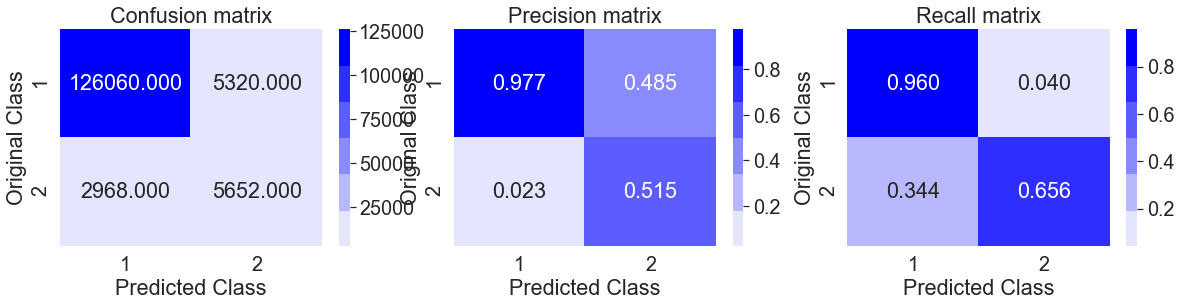

In [0]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools



plot_confusion_matrix(y_test, y_pred)

### Wiki Vector

In [0]:
#glove vector read file in python https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
def loadWikiModel(paragramFile):
    print ("Loading Wikipedia Model")
    f = open(paragramFile,'r', encoding="utf8", errors='ignore')
    model = {}
    for line in tqdm(f):
        splitLine = line.split(" ")
        word = splitLine[0]
        
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
wiki_model = loadWikiModel('wiki-news-300d-1M/wiki-news-300d-1M.vec')

Loading Wikipedia Model


999995it [01:39, 10021.05it/s]


Done. 999995  words loaded!


In [0]:
X_train_avg_wiki_vectors = []; # the avg-w2v for each sentence/review is stored in this list
wiki_words = set(wiki_model.keys())
for sentence in tqdm(X_train['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in wiki_words:
            vector += wiki_model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_wiki_vectors.append(vector)

print(len(X_train_avg_wiki_vectors))
print(len(X_train_avg_wiki_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 560000/560000 [00:15<00:00, 35522.22it/s]


560000
300


In [0]:
X_test_avg_wiki_vectors = []; # the avg-w2v for each sentence/review is stored in this list
wiki_words = set(wiki_model.keys())
for sentence in tqdm(X_test['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in wiki_words:
            vector += wiki_model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_wiki_vectors.append(vector)

print(len(X_test_avg_wiki_vectors))
print(len(X_test_avg_wiki_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 140000/140000 [00:03<00:00, 36603.19it/s]


140000
300


In [0]:
from scipy.sparse import hstack
import pickle
X_train_avg_wiki = hstack((X_train.drop(['question_text'], axis = 1), X_train_avg_wiki_vectors)).tocsr()
X_test_avg_wiki = hstack((X_test.drop(['question_text'], axis = 1), X_test_avg_wiki_vectors)).tocsr()
 
print (X_train_avg_wiki.shape)
print (X_test_avg_wiki.shape)


(560000, 321)
(140000, 321)


In [0]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs=1, random_state=10, scoring='f1', cv=5, n_iter= 10, verbose=10)
model.fit(X_train_avg_wiki, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.436, total=  25.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.3s remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.426, total=  19.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.9s remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.448, total=  24.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.422, total=  13.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.433, total=  14.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.185, total=   4.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.7min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.186, total=   4.5s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.187, total=   4.5s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.8min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.182, total=   4.5s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.183, total=   4.5s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.412, total=  21.3s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.288, total=  14.1s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.448, total=  39.9s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.371, total=  18.5s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.336, total=  20.6s
[CV] penalty=l1, alpha=1e-07 .........................................
[CV] ............. penalty=l1, alpha=1e-07, score=0.382, total=  53.1s
[CV] p

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. penalty=l1, alpha=1000, score=0.000, total=  10.0s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.000, total=  10.2s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.000, total=  10.1s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.000, total=  10.3s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.000, total=  10.2s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 20.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=1,
                   param_di

In [0]:
model.best_score_

0.43298360190363744

In [0]:
model.best_params_

{'penalty': 'l2', 'alpha': 1e-05}

In [0]:
y_pred = model.predict(X_test_avg_wiki)

score = f1_score(y_test, y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.6594096352539782
[[110942  20438]
 [  1182   7438]]


In [0]:
score = f1_score(y_test, y_pred)
print (score)

0.407606313020605


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91    131380
           1       0.27      0.86      0.41      8620

    accuracy                           0.85    140000
   macro avg       0.63      0.85      0.66    140000
weighted avg       0.94      0.85      0.88    140000



**** Confusion Matrix ******
[[110942  20438]
 [  1182   7438]]
**** Precision Matrix ******
[[0.9894581  0.73317549]
 [0.0105419  0.26682451]]
**** Recall Matrix ******
[[0.84443599 0.15556401]
 [0.13712297 0.86287703]]


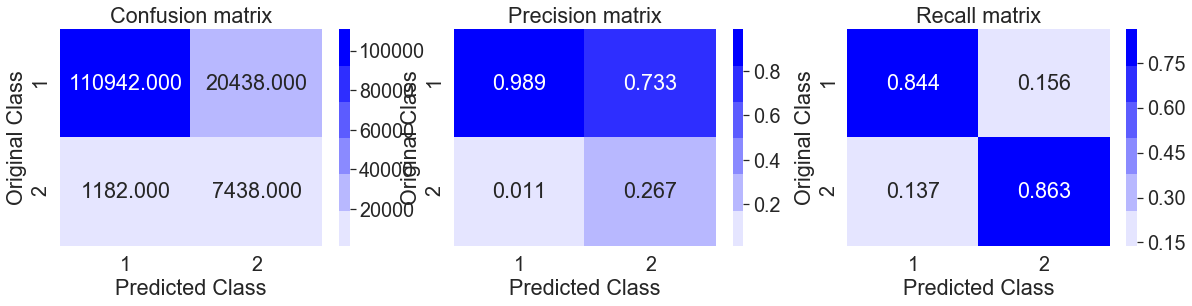

In [0]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools



plot_confusion_matrix(y_test, y_pred)

In [0]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs=1, random_state=10, scoring=f1, cv=5, n_iter= 10, verbose=10)
model.fit(X_train_avg_wiki, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.703, total= 1.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.632, total=  31.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.667, total=  28.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.681, total=  43.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.668, total=  43.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.5min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.484, total=  11.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.7min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.493, total=  10.8s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.9min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.494, total=  10.7s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.1min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.492, total=  10.9s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.2min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.482, total=  10.5s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.633, total=  47.6s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.630, total=  43.8s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.642, total=  54.7s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.593, total=  41.4s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.644, total=  54.1s
[CV] penalty=l1, alpha=1e-07 .........................................
[CV] ............. penalty=l1, alpha=1e-07, score=0.647, total= 3.5min
[CV] p

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.4s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.2s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.0s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.0s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 45.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=1,
                   param_di

In [0]:
model.best_score_

0.6701188026258194

In [0]:
y_pred = model.predict(X_test_avg_wiki)

score = f1_score(y_test, y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.6824873338885825
[[113306  18074]
 [  1031   7589]]


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92    131380
           1       0.30      0.88      0.44      8620

    accuracy                           0.86    140000
   macro avg       0.64      0.87      0.68    140000
weighted avg       0.95      0.86      0.89    140000



In [0]:
score = f1_score(y_test, y_pred)
print (score)

0.44272671586500606


**** Confusion Matrix ******
[[113306  18074]
 [  1031   7589]]
**** Precision Matrix ******
[[0.9909828  0.70428243]
 [0.0090172  0.29571757]]
**** Recall Matrix ******
[[0.86242959 0.13757041]
 [0.11960557 0.88039443]]


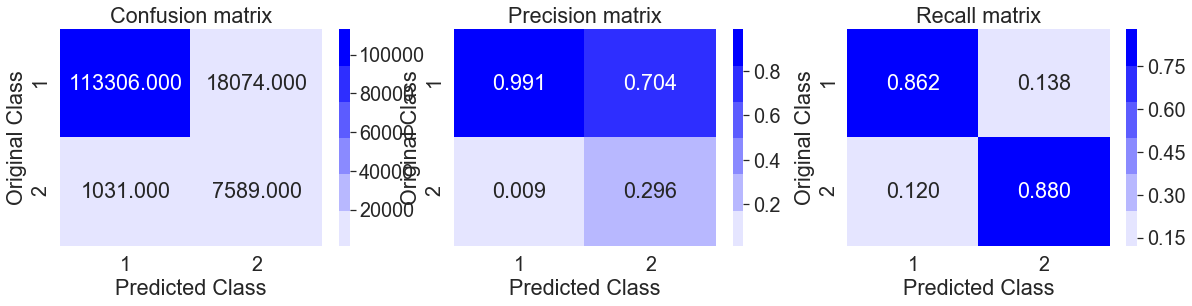

In [0]:
plot_confusion_matrix(y_test, y_pred)

#### XGBoost

In [0]:
params = {
    "n_estimators": stats.randint(10, 300), 
    "max_depth": stats.randint(2, 10),    
    "learning_rate": stats.uniform(0.01, 1),
     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}        
    
xg = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0, reg_alpha= 1, scale_pos_weight=15.25)
model = RandomizedSearchCV(xg, params, scoring= f1,  cv=5, n_jobs= 1, random_state=12, n_iter= 5, verbose=10)
model.fit(X_train_avg_wiki, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
